In [45]:
import pandas as pd
import sys
sys.path.append('../../utils')
import visualization as visualization
import generic as generic
import project_utils as project_utils
import numpy as np
import matplotlib.pyplot as plt
import importlib



### Load Data

In [2]:
dengue_data = pd.read_csv('../../data/processed/dengue_data_with_coordinates.csv')
ovitraps_data = pd.read_csv('../../data/processed/ovitraps_data_with_coordinates.csv')


### Process Data

In [3]:
# Dengue data
weekly_dengue_data = project_utils.get_weekly_dengue(dengue_data)
daily_dengue_cases = project_utils.get_daily_dengue(dengue_data)

# ovitraps data
weekly_ovitraps = project_utils.get_weekly_ovitraps(ovitraps_data)
weekly_ovitraps_sum = weekly_ovitraps.sum(axis=1)
weekly_ovitraps_mean = weekly_ovitraps.mean(axis=1)

### Plot data

#### Dengue

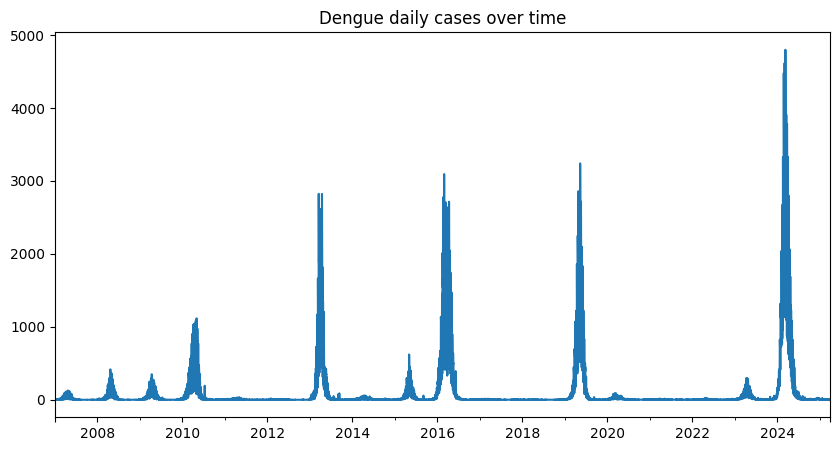

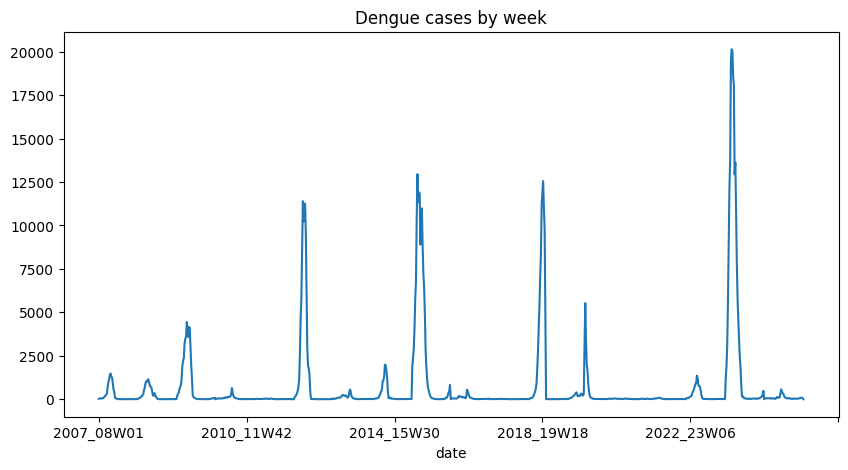

In [4]:
daily_dengue_cases.plot(kind='line', figsize=(10, 5), title='Dengue daily cases over time')
plt.show()
weekly_dengue_data.plot(kind='line', figsize=(10, 5), title='Dengue cases by week')
plt.show()


c:\Users\User\miniconda3\envs\venv_ovitraps\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


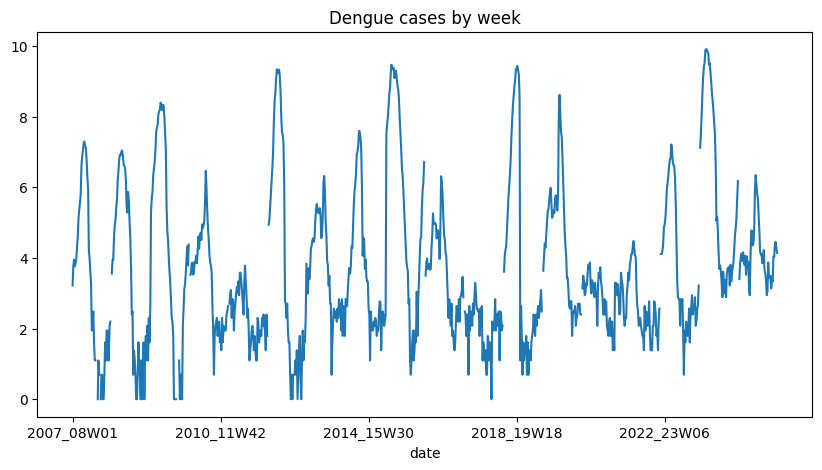

In [5]:
np.log(weekly_dengue_data).plot(kind='line', figsize=(10, 5), title='Dengue cases by week')
plt.show()

#### Ovitraps

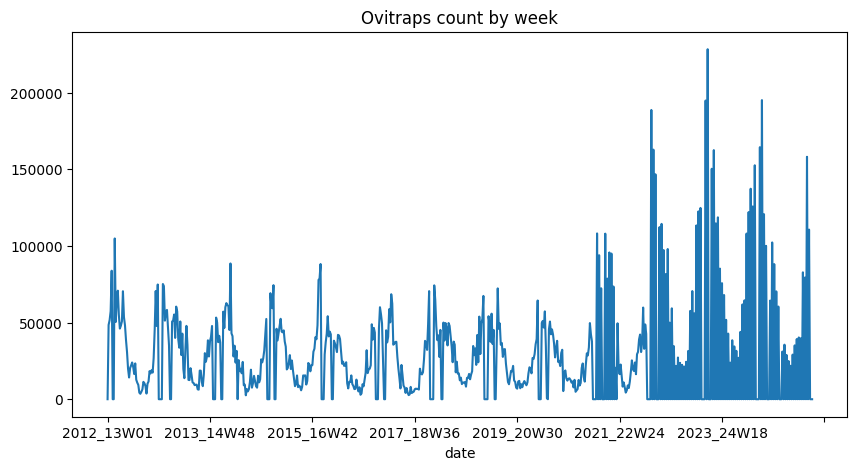

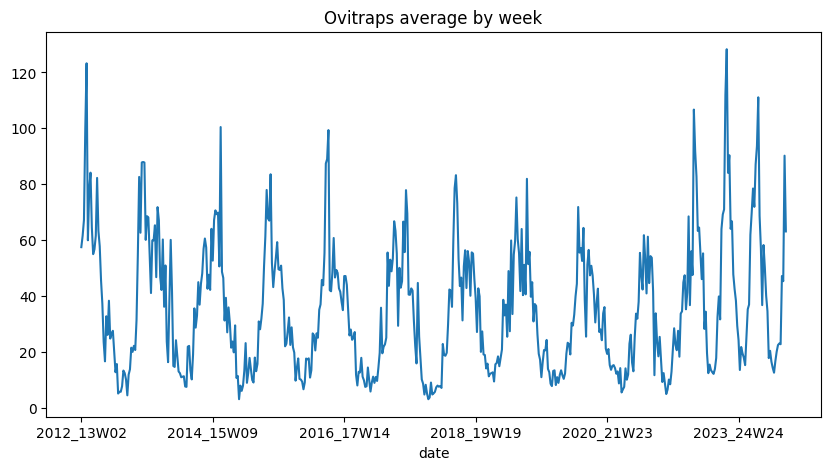

In [6]:
weekly_ovitraps_sum.plot(kind='line', figsize=(10, 5), title='Ovitraps count by week')
plt.show()
weekly_ovitraps_mean.dropna().plot(kind='line', figsize=(10, 5), title='Ovitraps average by week')
plt.show()

# Correlation Analysis

### All years

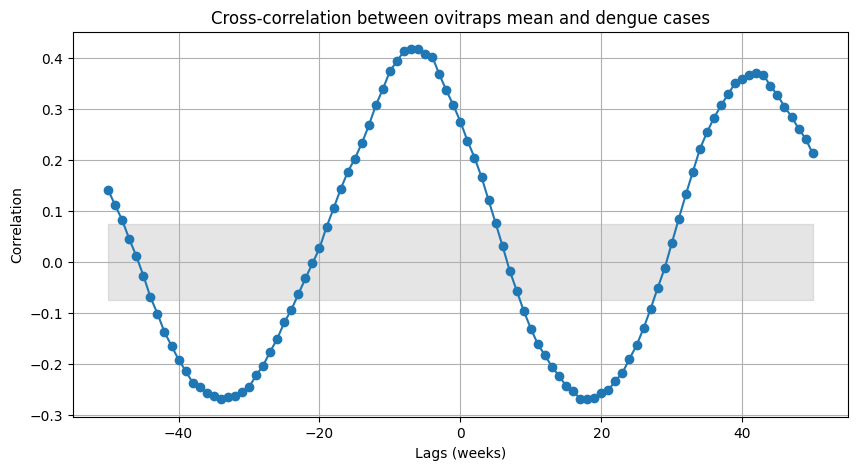

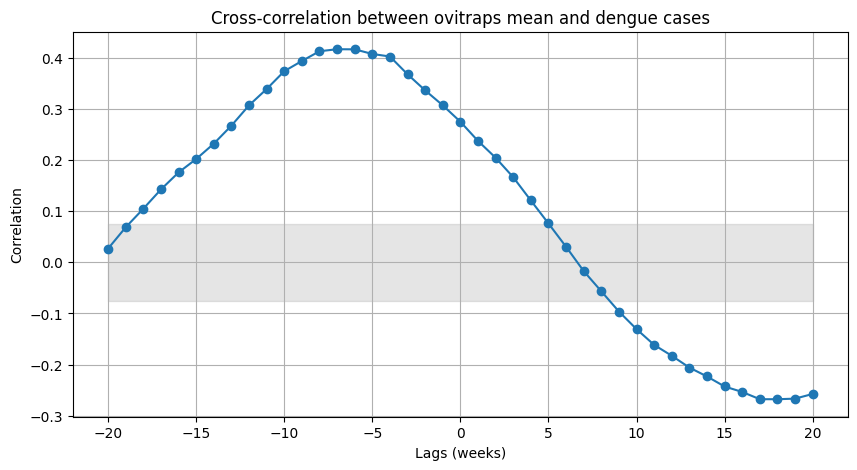

In [7]:
generic.plot_cross_correlation(
    series_1 = weekly_ovitraps_mean,
    series_2 = weekly_dengue_data,
    max_lag =  50,
    title = 'Cross-correlation between ovitraps mean and dengue cases',
    x_label = 'Lags (weeks)',
    )

generic.plot_cross_correlation(
    series_1 = weekly_ovitraps_mean,
    series_2 = weekly_dengue_data,
    max_lag =  20,
    title = 'Cross-correlation between ovitraps mean and dengue cases',
    x_label = 'Lags (weeks)',

    )

### Epidemic years


<Axes: title={'center': 'Dengue cases by week (epidemic years)'}, xlabel='date'>

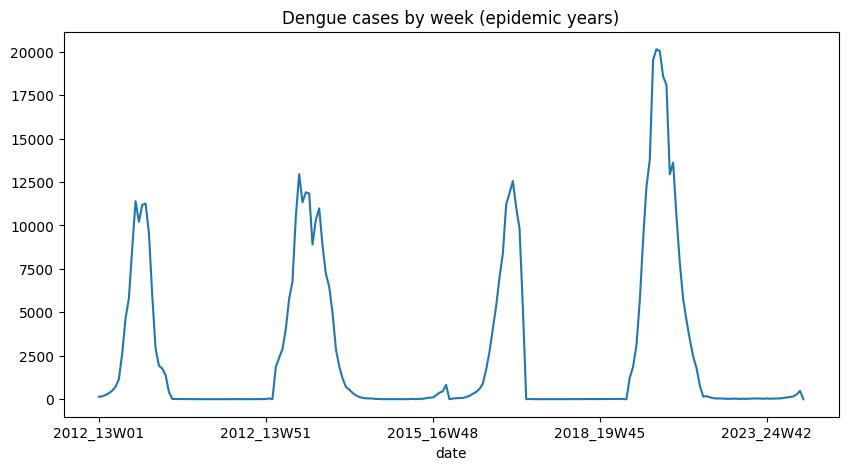

In [9]:
epidemic_mask = weekly_dengue_data.index.map(lambda x: x[:7] in project_utils.EPIDEMY_YEARS)
weekly_dengue_data_epidemic = weekly_dengue_data[epidemic_mask]
weekly_dengue_data_epidemic.plot(kind='line', figsize=(10, 5), title='Dengue cases by week (epidemic years)')


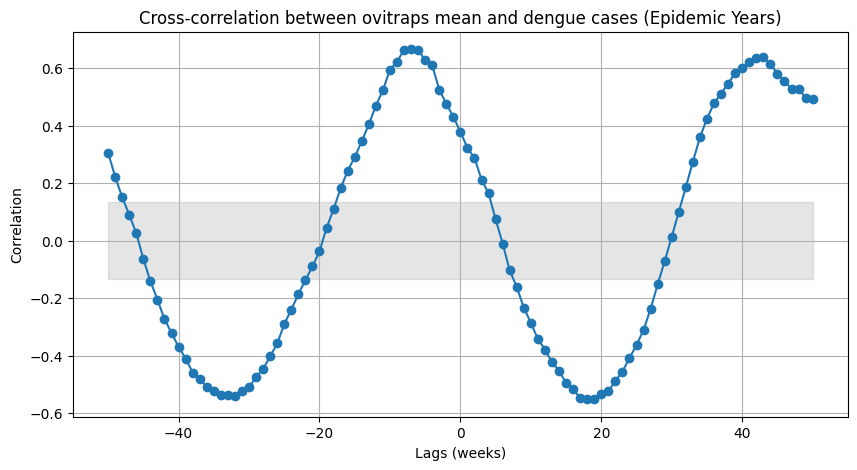

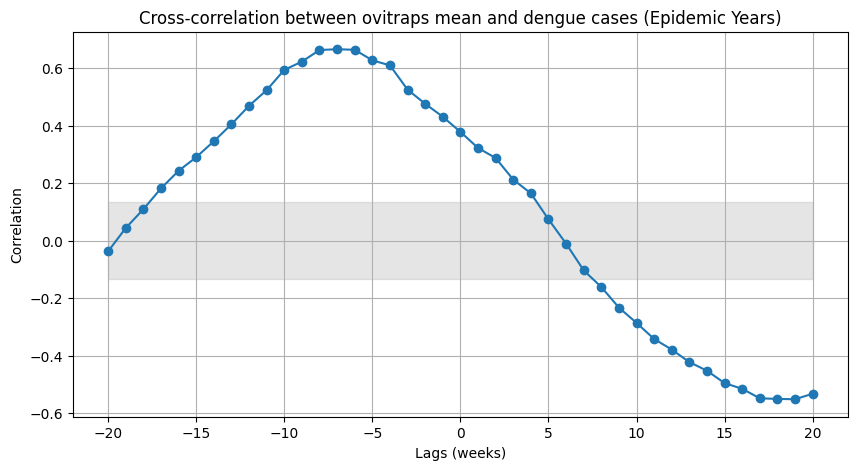

In [10]:
generic.plot_cross_correlation(
    series_1 = weekly_ovitraps_mean,
    series_2 = weekly_dengue_data_epidemic,
    max_lag =  50,
    title = 'Cross-correlation between ovitraps mean and dengue cases (Epidemic Years)',
    x_label = 'Lags (weeks)',
    )

generic.plot_cross_correlation(
    series_1 = weekly_ovitraps_mean,
    series_2 = weekly_dengue_data_epidemic,
    max_lag =  20,
    title = 'Cross-correlation between ovitraps mean and dengue cases (Epidemic Years)',
    x_label = 'Lags (weeks)',
    )

### Non epidemic years

<Axes: title={'center': 'Dengue cases by week (epidemic years)'}, xlabel='date'>

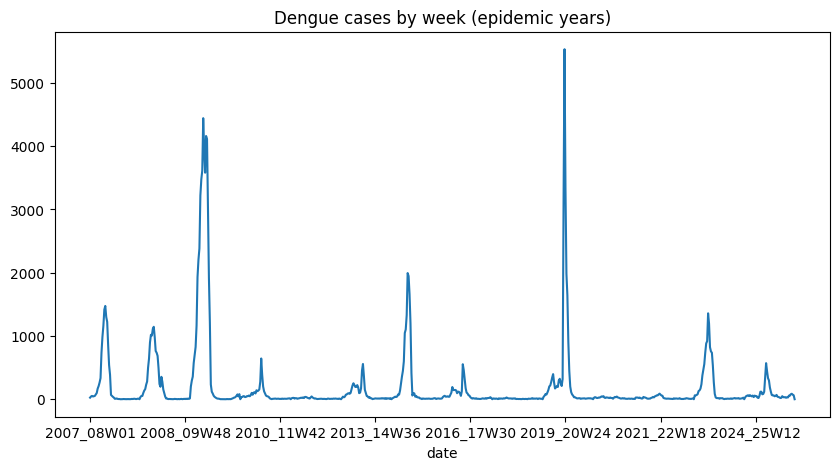

In [11]:
weekly_dengue_data_non_epidemic = weekly_dengue_data[~epidemic_mask]
weekly_dengue_data_non_epidemic.plot(kind='line', figsize=(10, 5), title='Dengue cases by week (epidemic years)')


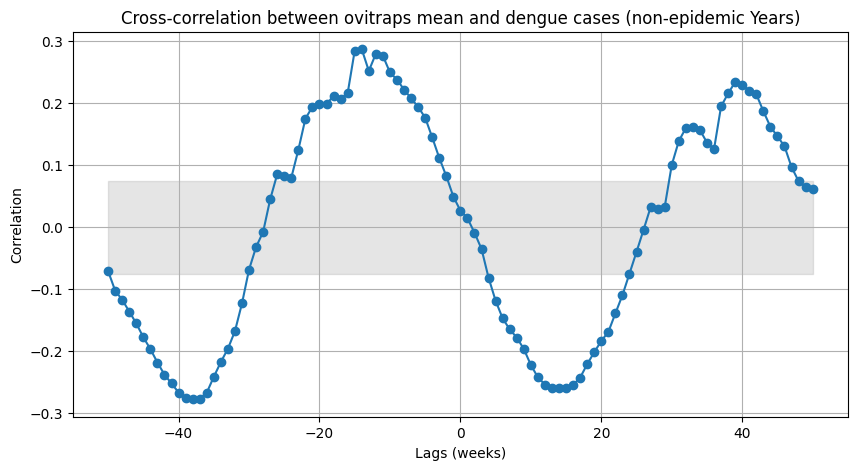

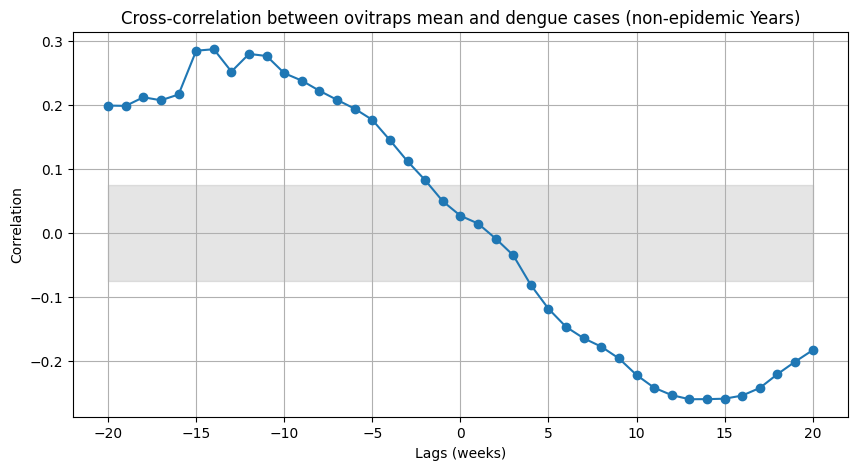

In [12]:
# Filter non epidemic years
generic.plot_cross_correlation(
    series_1 = weekly_ovitraps_mean,
    series_2 = weekly_dengue_data_non_epidemic,
    max_lag =  50,
    title = 'Cross-correlation between ovitraps mean and dengue cases (non-epidemic Years)',
    x_label = 'Lags (weeks)',
    )

generic.plot_cross_correlation(
    series_1 = weekly_ovitraps_mean,
    series_2 = weekly_dengue_data_non_epidemic,
    max_lag =  20,
    title = 'Cross-correlation between ovitraps mean and dengue cases (non-epidemic Years)',
    x_label = 'Lags (weeks)',
    )

### Correlation by year

Skipping year 2006_07 due to error: Both series must have at least one valid value to calculate correlation.
Skipping year 2007_08 due to error: Both series must have at least one valid value to calculate correlation.
Skipping year 2008_09 due to error: Both series must have at least one valid value to calculate correlation.
Skipping year 2009_10 due to error: Both series must have at least one valid value to calculate correlation.
Skipping year 2010_11 due to error: Both series must have at least one valid value to calculate correlation.
Skipping year 2011_12 due to error: Both series must have at least one valid value to calculate correlation.


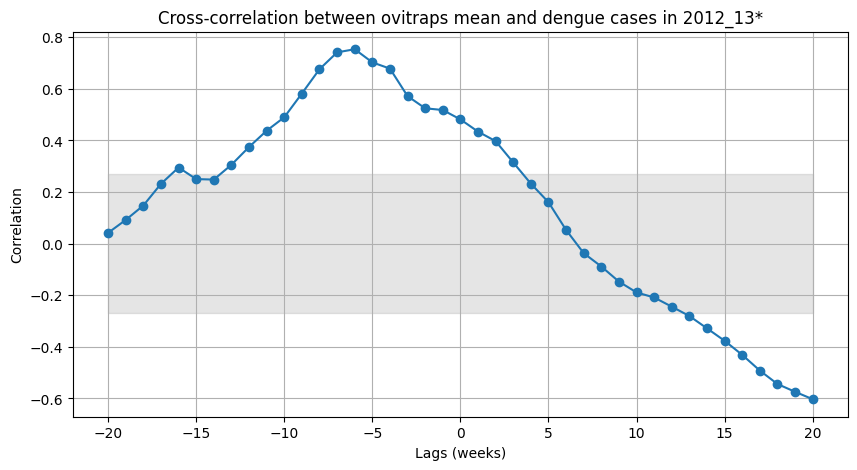

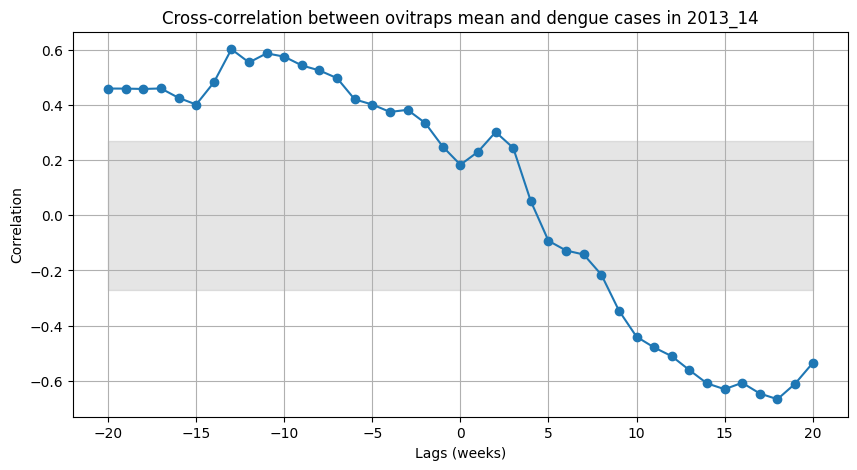

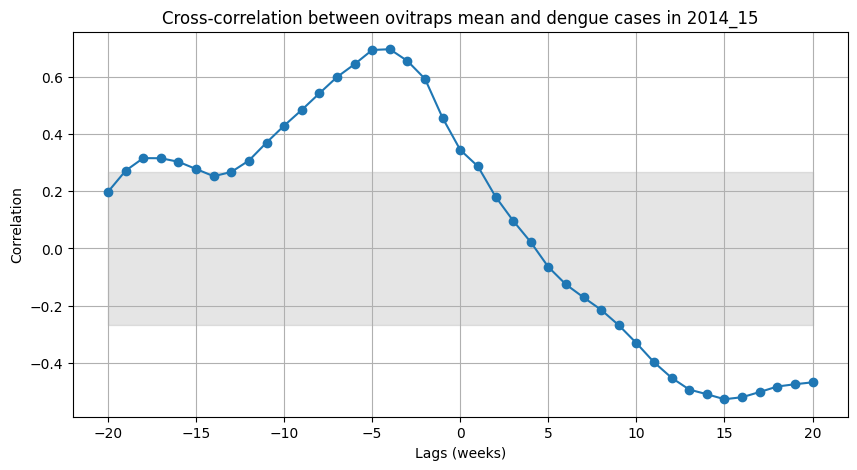

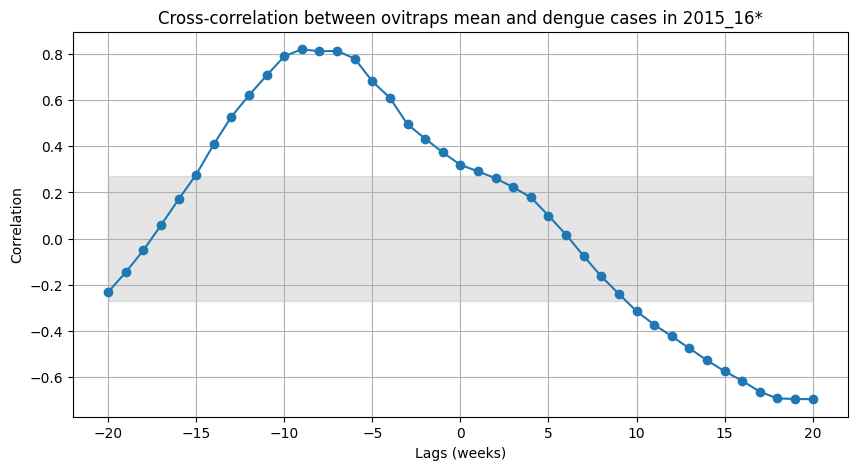

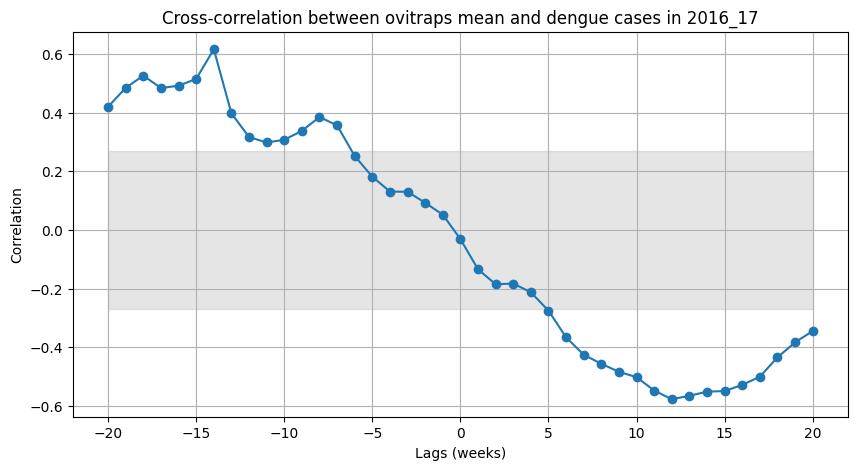

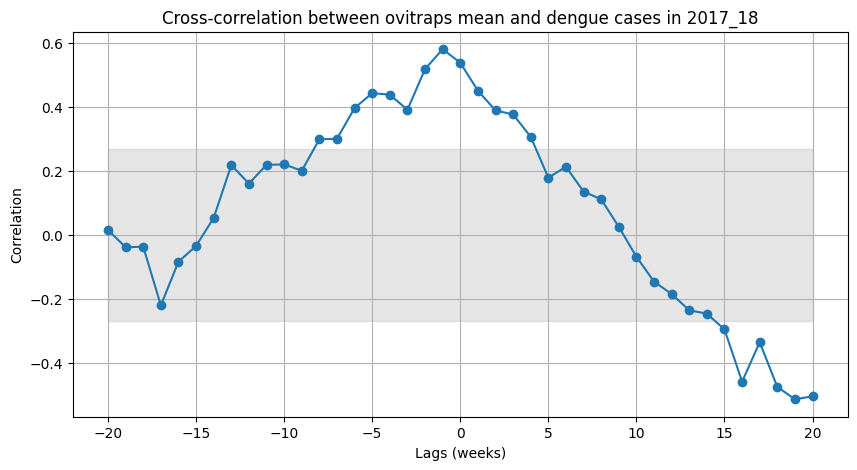

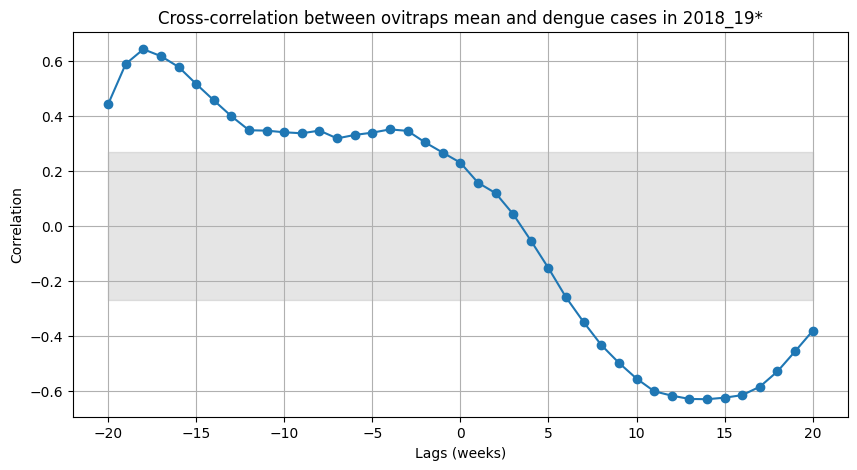

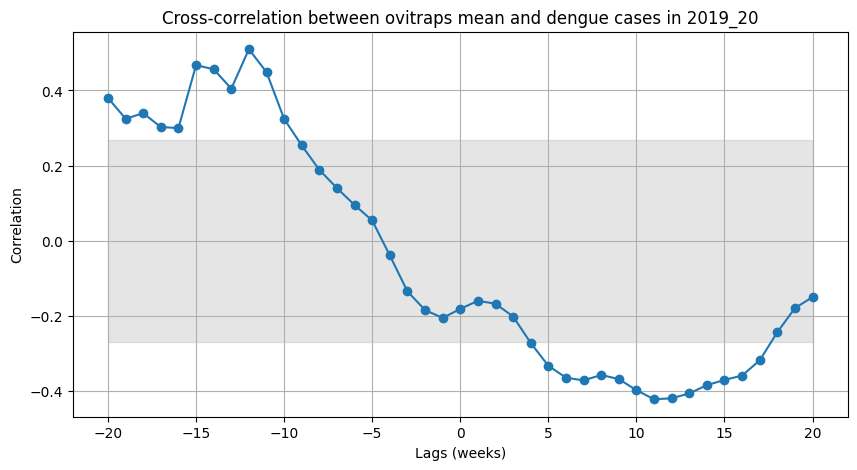

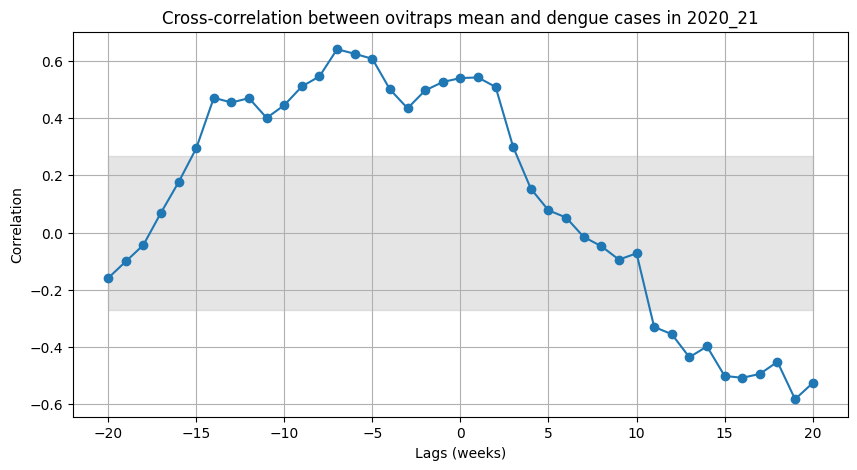

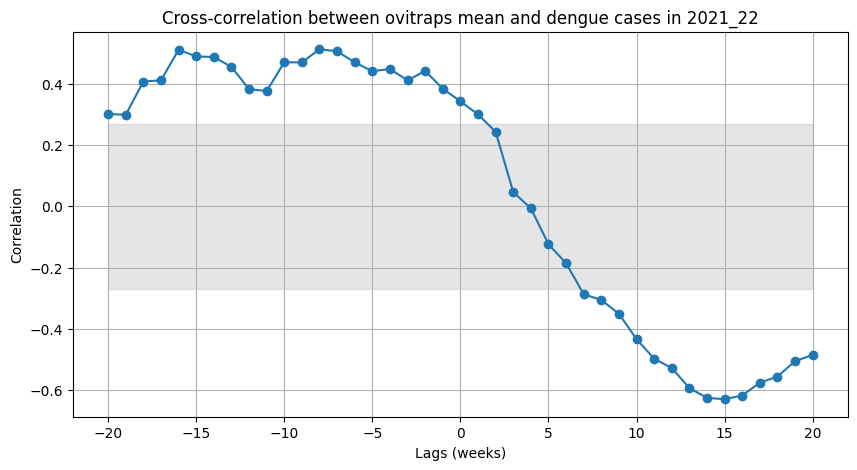

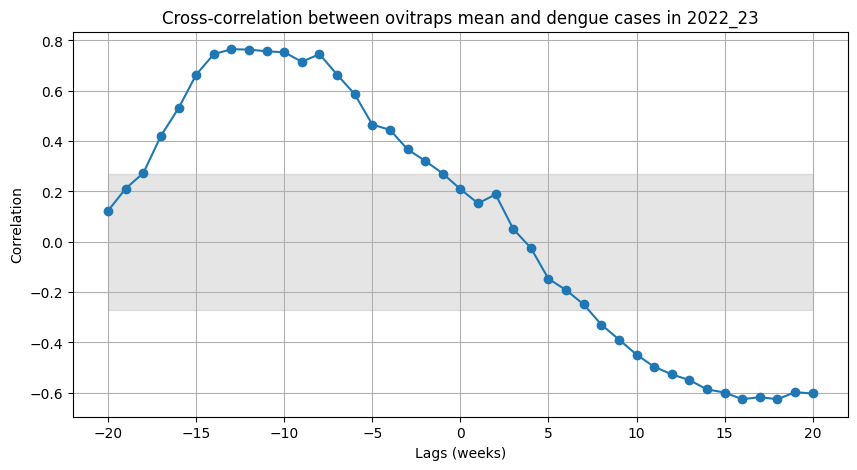

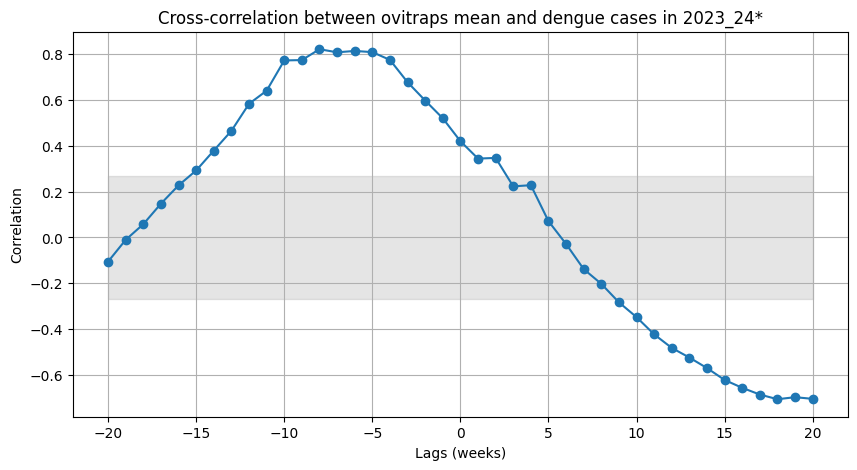

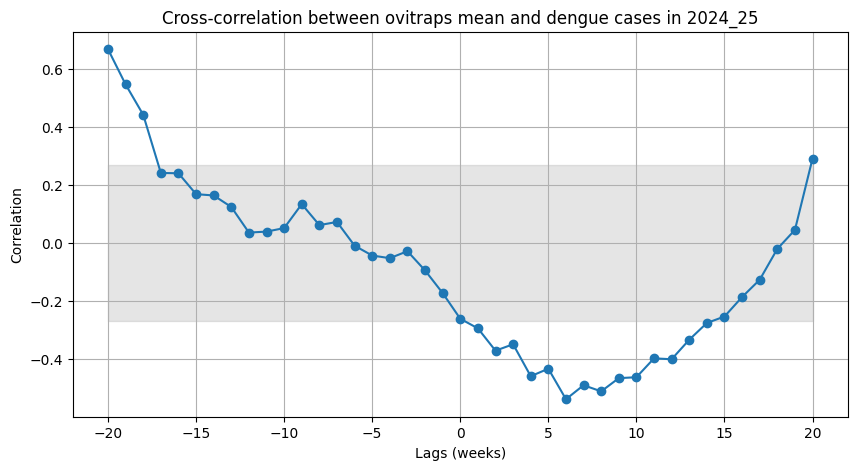

Both series are empty after dropping NaN values.


c:\Users\User\miniconda3\envs\venv_ovitraps\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\User\miniconda3\envs\venv_ovitraps\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\User\miniconda3\envs\venv_ovitraps\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\User\miniconda3\envs\venv_ovitraps\Lib\site-packages\numpy\lib\function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\User\miniconda3\envs\venv_ovitraps\Lib\site-packages\numpy\lib\function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\User\miniconda3\envs\venv_ovitraps\Lib\site-packages\numpy\lib\function_base.py:2748: Run

In [13]:
all_years = dengue_data.anoepid.unique()
all_years.sort()
max_correlation_dict = {}
for year in all_years:
    year_mask = weekly_dengue_data.index.map(lambda x: x[:7] == year)
    year_data = weekly_dengue_data[year_mask]
    try:
        if year in project_utils.EPIDEMY_YEARS:
            marker = '*'
        else:
            marker = ''    
        # Plot cross-correlation for each year
        generic.plot_cross_correlation(
            series_1 = weekly_ovitraps_mean,
            series_2 = year_data,
            max_lag =  20,
            title = f'Cross-correlation between ovitraps mean and dengue cases in {year}{marker}',
            x_label = 'Lags (weeks)',
            )
        plt.show()
        
        # Get the maximum correlation for each year
        max_correlation_dict[year] = generic.max_correlation(
                                    series_1 = weekly_ovitraps_mean,
                                    series_2 = year_data,
                                    max_lag =  50,
                                            )
    except ValueError as e:
        print(f"Skipping year {year} due to error: {e}")
        continue

## Maximum correlation

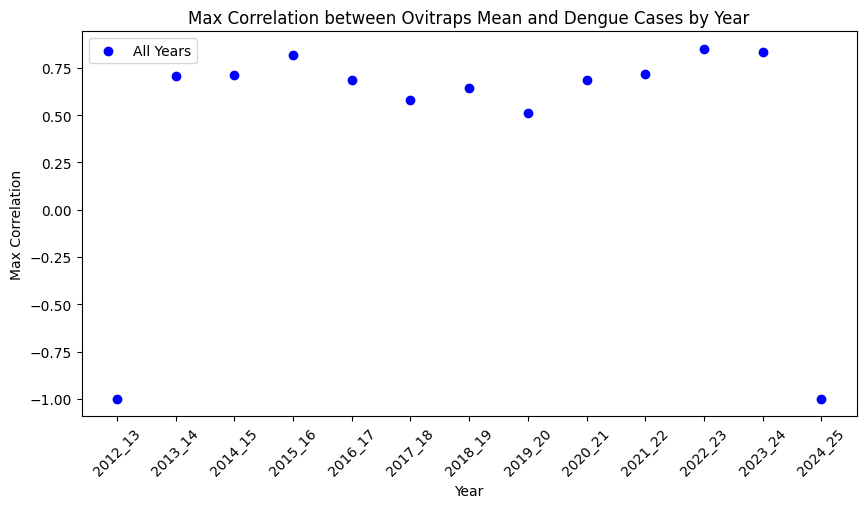

In [14]:
# Plot max correlations for all years
plt.figure(figsize=(10, 5))
plt.scatter(max_correlation_dict.keys(), [v[1] for v in max_correlation_dict.values()], color='blue', label='All Years')
plt.ylabel('Max Correlation')
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.legend()
plt.title('Max Correlation between Ovitraps Mean and Dengue Cases by Year')
plt.show()


# Scatter Plots

### All years

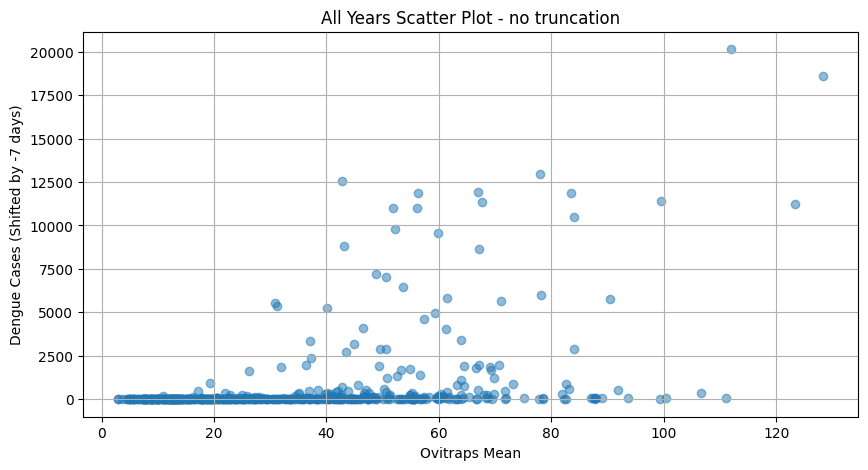

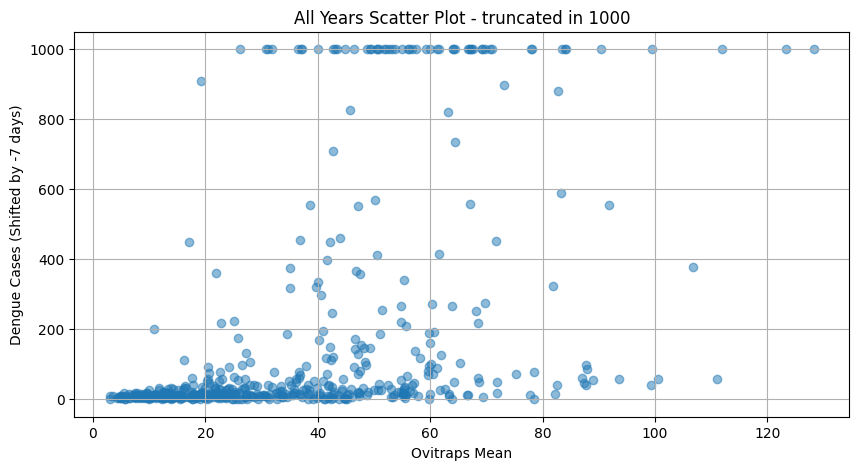

c:\Users\User\miniconda3\envs\venv_ovitraps\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


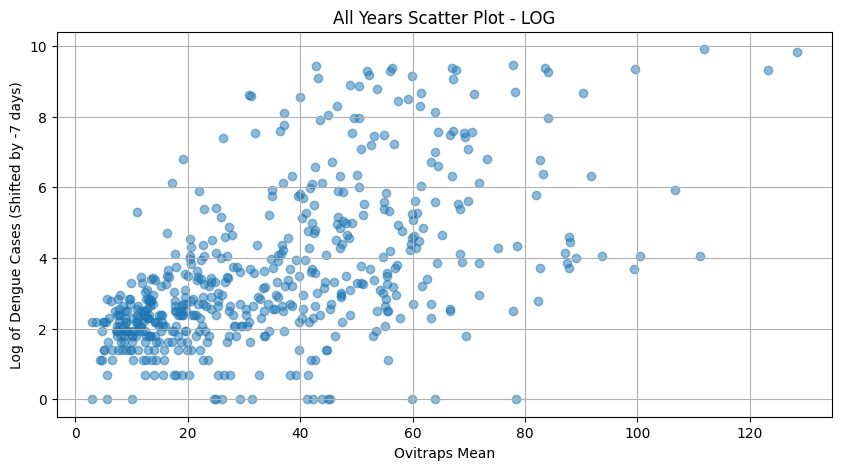

In [15]:
shift = -7

generic.two_series_scatter_plot(weekly_ovitraps_mean,
                                weekly_dengue_data,
                                series_2_shift = shift,
                                title = 'All Years Scatter Plot - no truncation',
                                xlabel='Ovitraps Mean',
                                ylabel=f'Dengue Cases (Shifted by {shift} days)',
                                )   

generic.two_series_scatter_plot(weekly_ovitraps_mean,
                                weekly_dengue_data.clip(upper=1000),
                                series_2_shift = shift,
                                title = 'All Years Scatter Plot - truncated in 1000',
                                xlabel='Ovitraps Mean',
                                ylabel=f'Dengue Cases (Shifted by {shift} days)',
                                )   

generic.two_series_scatter_plot(weekly_ovitraps_mean,
                                np.log(weekly_dengue_data).replace(-np.inf, 0),
                                series_2_shift = shift,
                                title =  'All Years Scatter Plot - LOG',
                                xlabel='Ovitraps Mean',
                                ylabel=f'Log of Dengue Cases (Shifted by {shift} days)',
                                )   

### Epidemic years

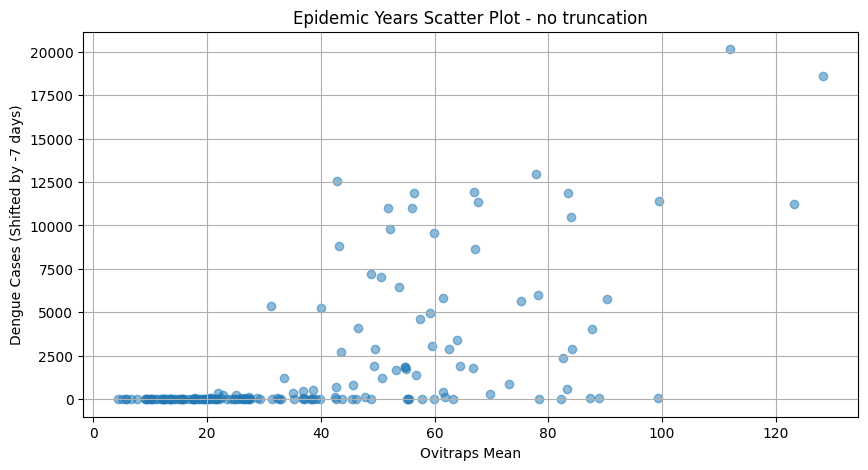

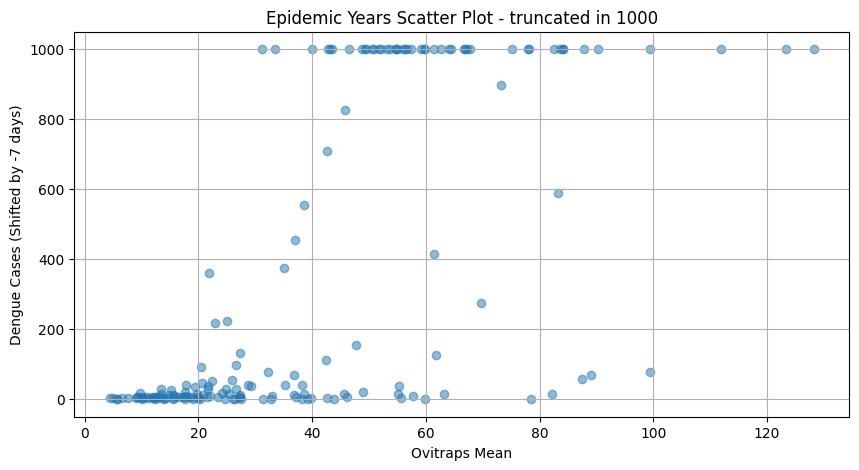

c:\Users\User\miniconda3\envs\venv_ovitraps\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


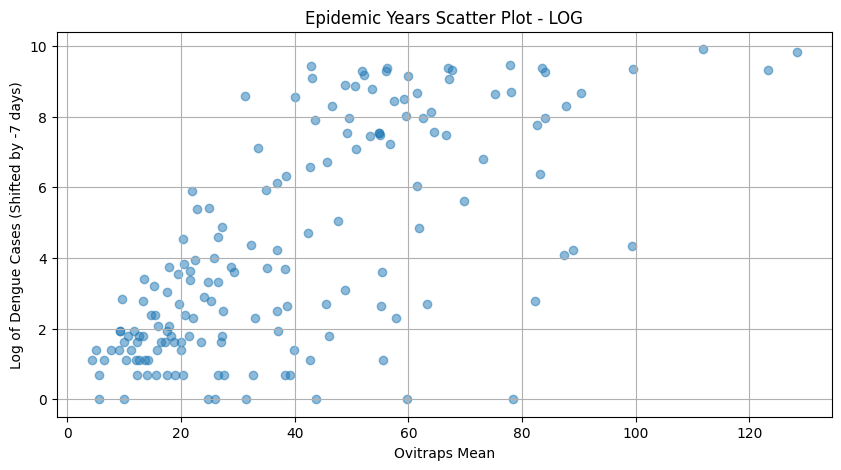

In [16]:
shift = -7

generic.two_series_scatter_plot(weekly_ovitraps_mean,
                                weekly_dengue_data_epidemic,
                                series_2_shift = shift,
                                title = 'Epidemic Years Scatter Plot - no truncation',
                                xlabel='Ovitraps Mean',
                                ylabel=f'Dengue Cases (Shifted by {shift} days)',
                                )   

generic.two_series_scatter_plot(weekly_ovitraps_mean,
                                weekly_dengue_data_epidemic.clip(upper=1000),
                                series_2_shift = shift,
                                title = 'Epidemic Years Scatter Plot - truncated in 1000',
                                xlabel='Ovitraps Mean',
                                ylabel=f'Dengue Cases (Shifted by {shift} days)',
                                )   

generic.two_series_scatter_plot(weekly_ovitraps_mean,
                                np.log(weekly_dengue_data_epidemic).replace(-np.inf, 0),
                                series_2_shift = shift,
                                title =  'Epidemic Years Scatter Plot - LOG',
                                xlabel='Ovitraps Mean',
                                ylabel=f'Log of Dengue Cases (Shifted by {shift} days)',
                                )   

### Non epidemic years

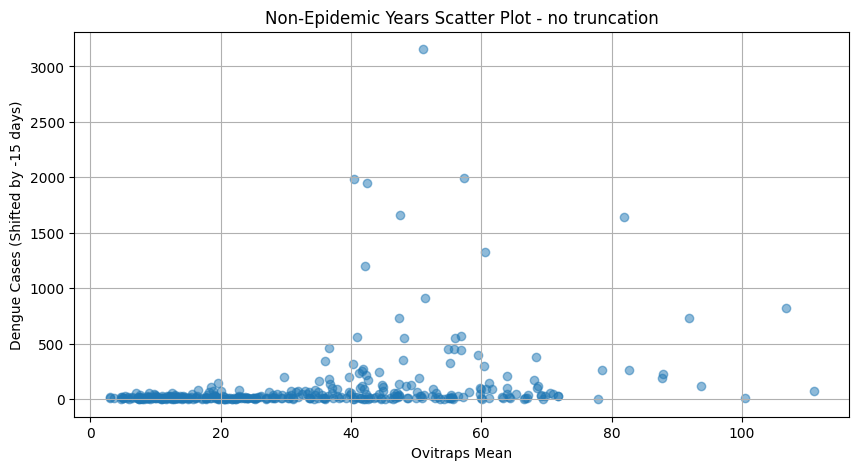

In [17]:
shift = -15

generic.two_series_scatter_plot(weekly_ovitraps_mean,
                                weekly_dengue_data_non_epidemic,
                                series_2_shift = shift,
                                title = 'Non-Epidemic Years Scatter Plot - no truncation',
                                xlabel='Ovitraps Mean',
                                ylabel=f'Dengue Cases (Shifted by {shift} days)',
                                )   


### Year by year

Skipping year 2006_07 due to error: Both series must have at least one valid value to plot.
Skipping year 2007_08 due to error: Both series must have at least one valid value to plot.
Skipping year 2008_09 due to error: Both series must have at least one valid value to plot.
Skipping year 2009_10 due to error: Both series must have at least one valid value to plot.
Skipping year 2010_11 due to error: Both series must have at least one valid value to plot.
Skipping year 2011_12 due to error: Both series must have at least one valid value to plot.


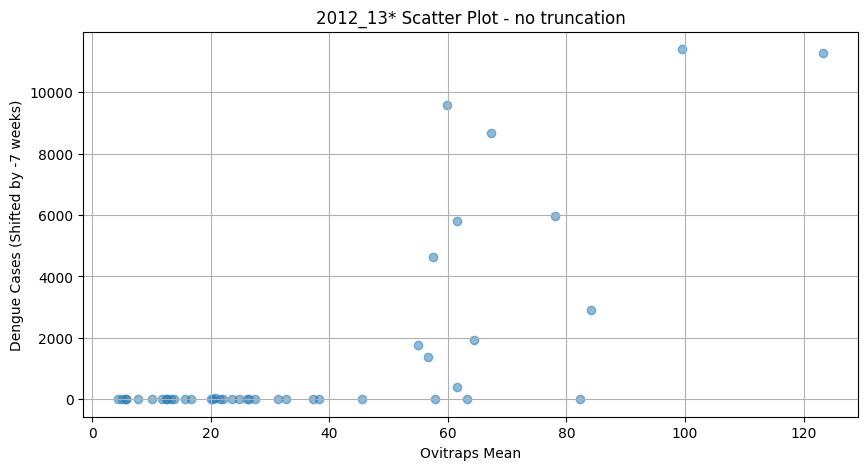

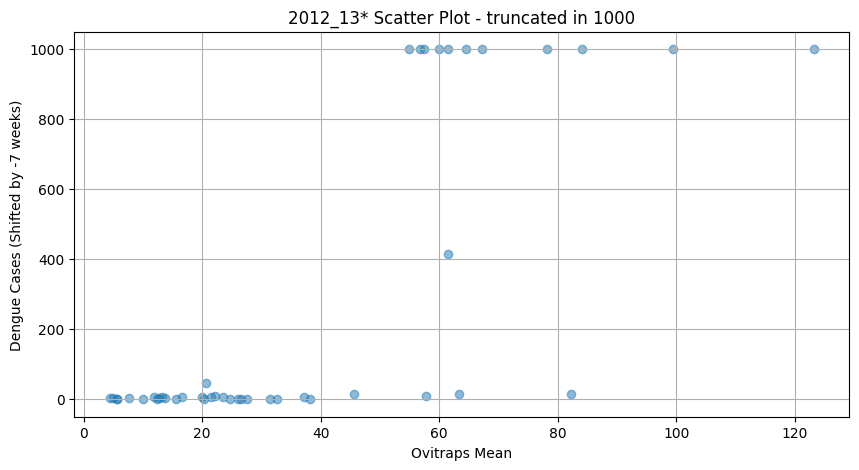

c:\Users\User\miniconda3\envs\venv_ovitraps\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


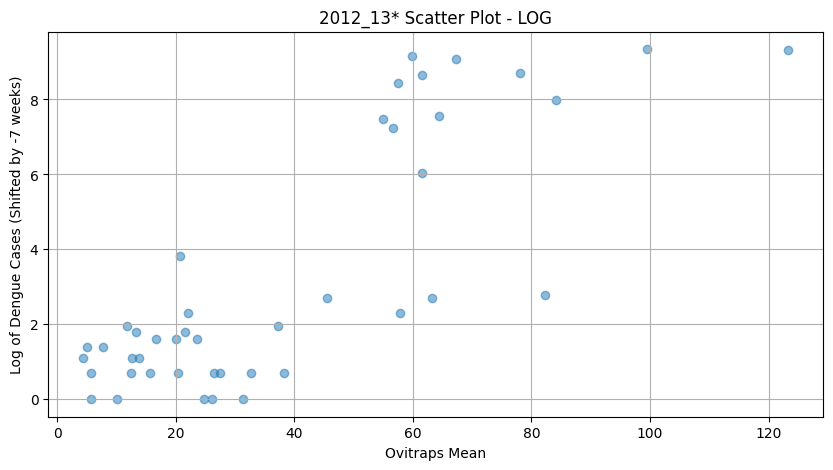

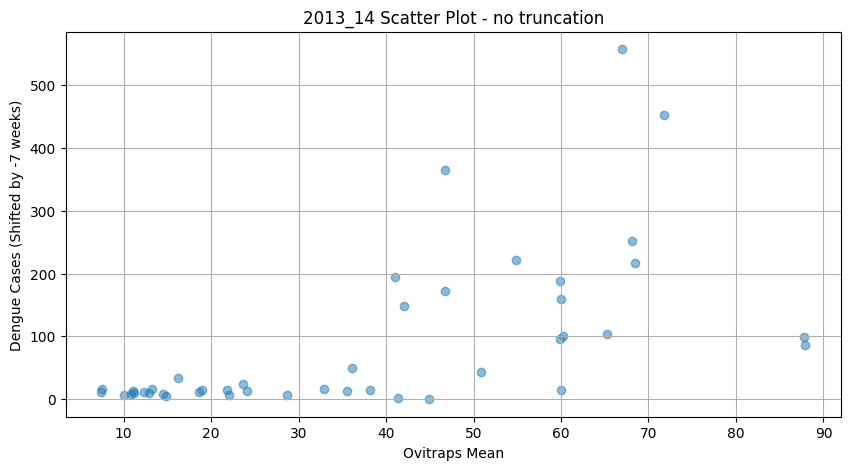

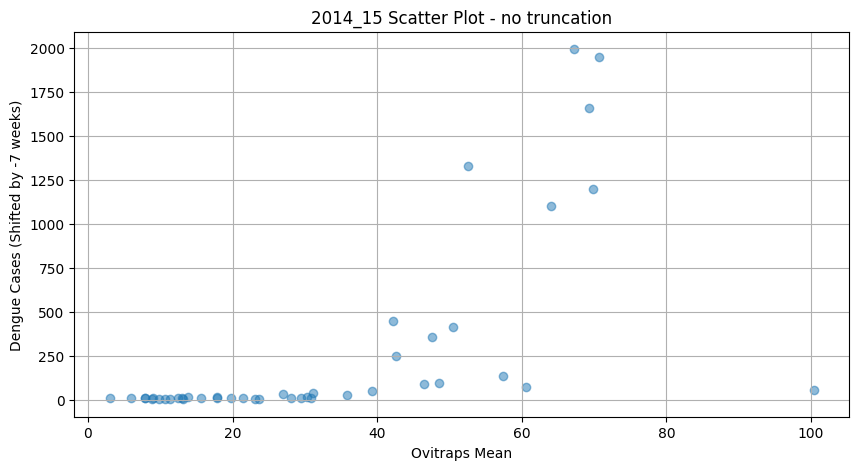

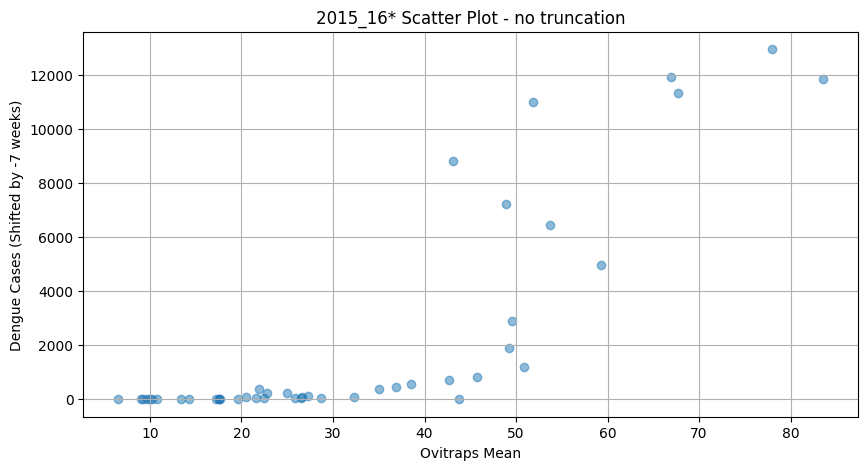

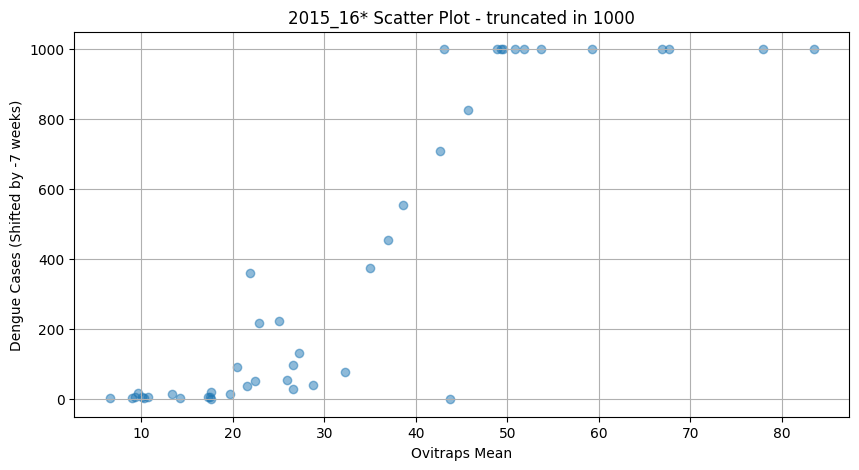

c:\Users\User\miniconda3\envs\venv_ovitraps\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


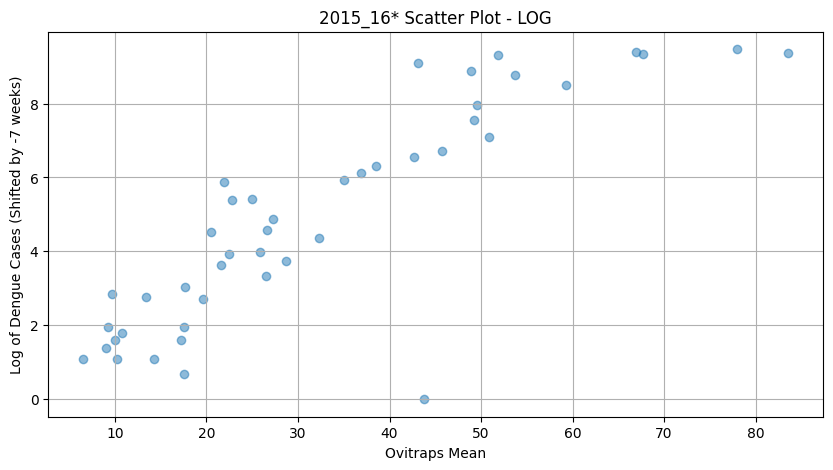

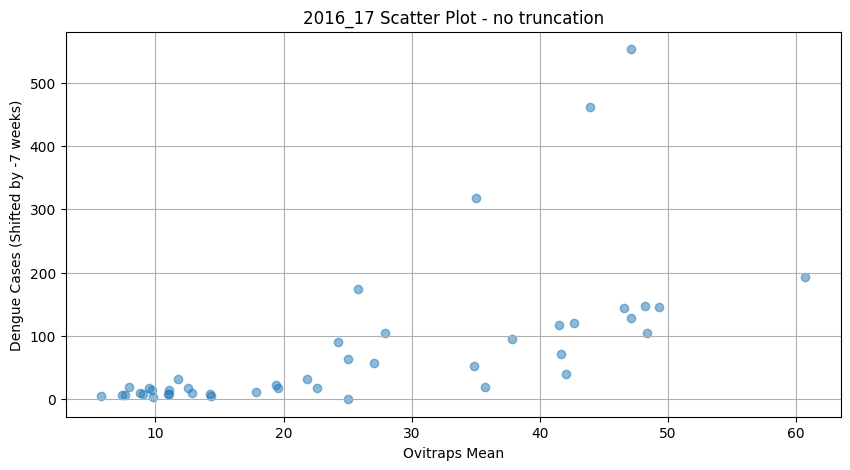

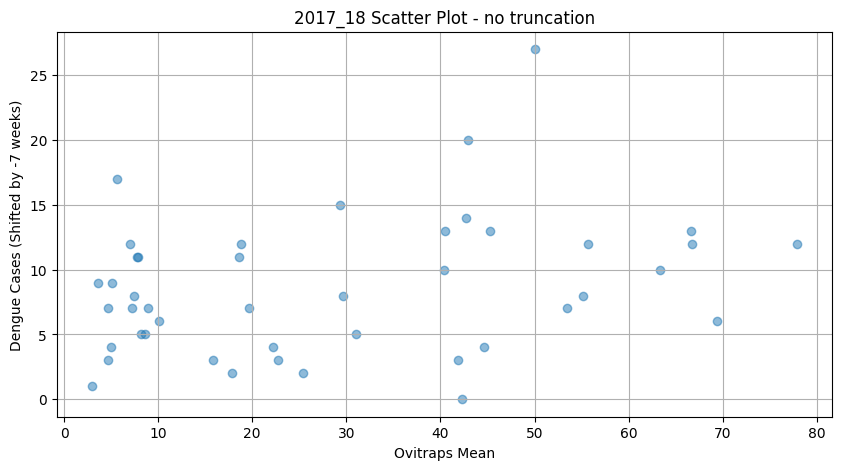

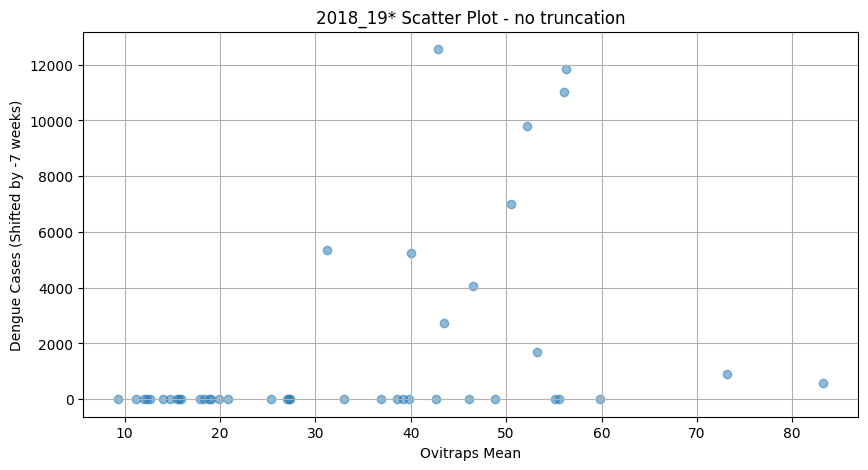

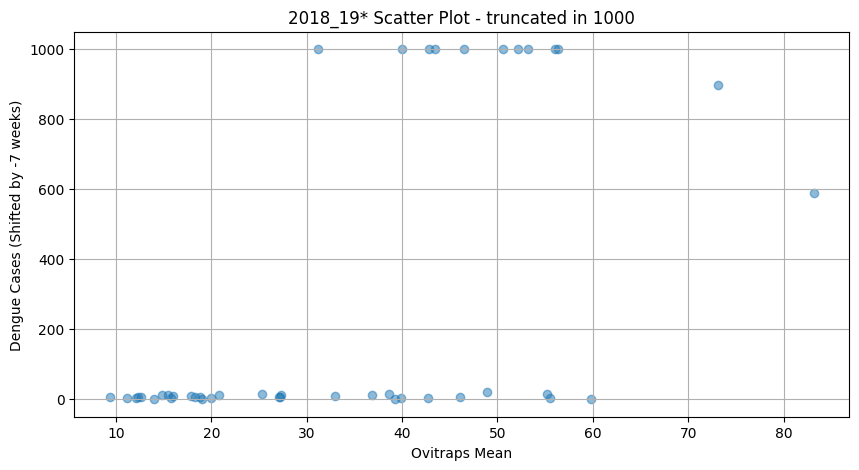

c:\Users\User\miniconda3\envs\venv_ovitraps\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


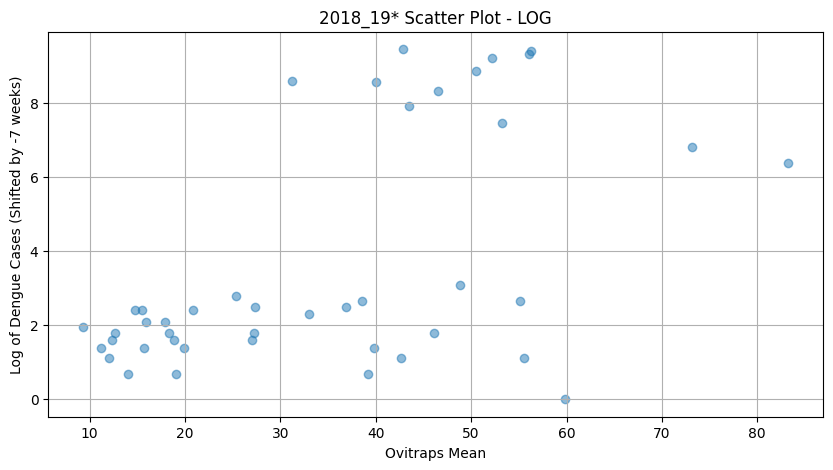

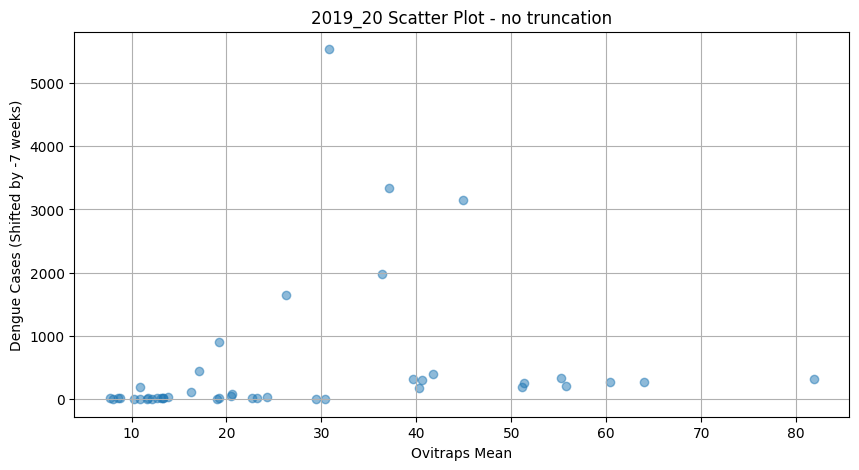

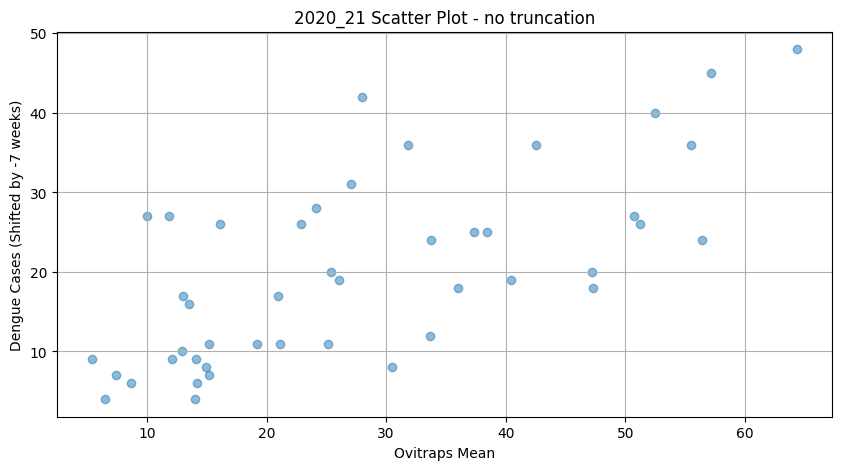

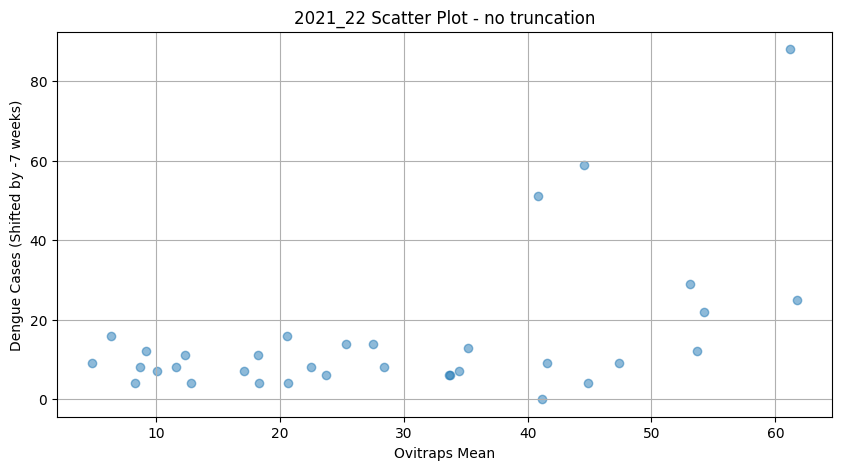

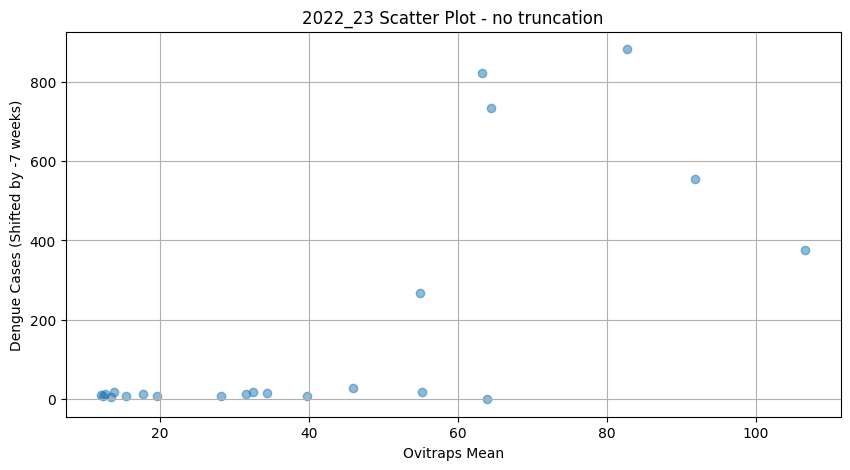

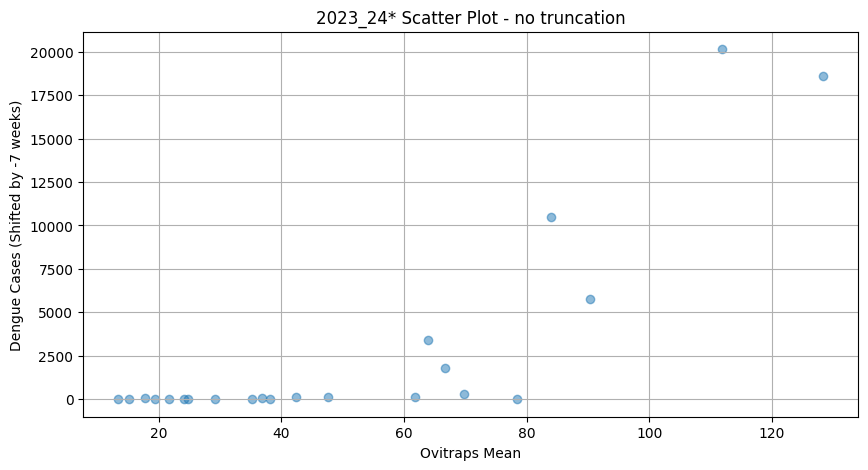

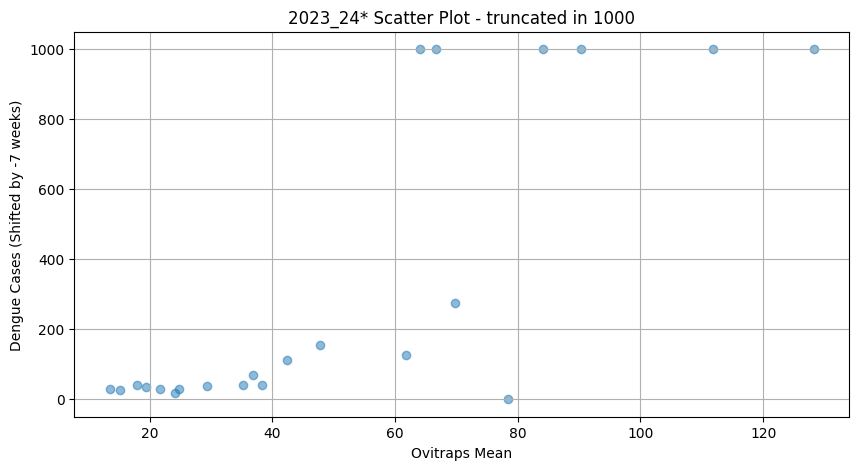

c:\Users\User\miniconda3\envs\venv_ovitraps\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


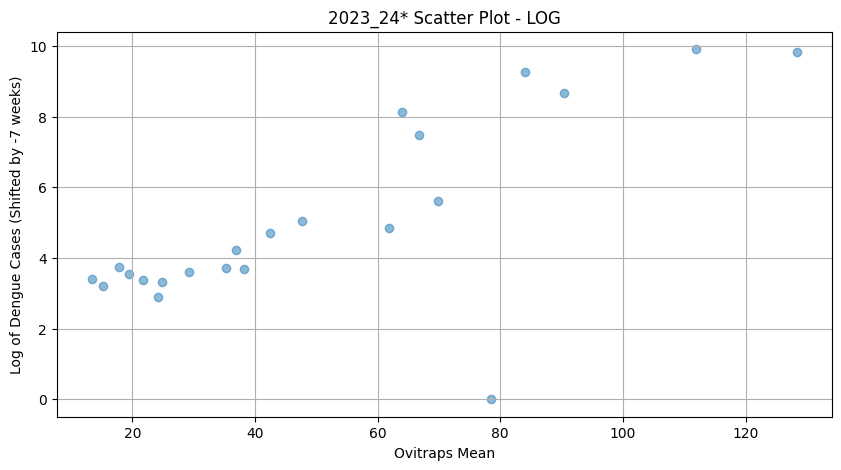

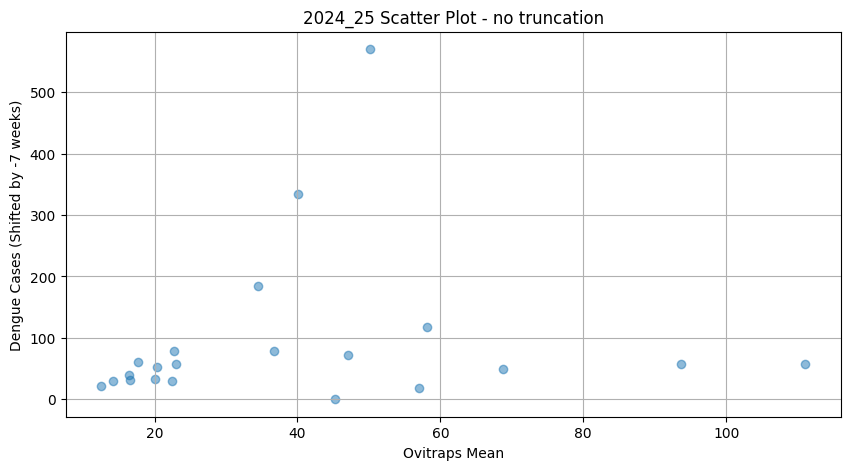

In [18]:
shift = -7
all_years = dengue_data.anoepid.unique()
all_years.sort()
max_correlation_dict = {}
for year in all_years:
    year_mask = weekly_dengue_data.index.map(lambda x: x[:7] == year)
    year_data = weekly_dengue_data[year_mask]
    try:
        if year in project_utils.EPIDEMY_YEARS:

            marker = '*'
        else:
            marker = ''    
        # Plot cross-correlation for each year
        generic.two_series_scatter_plot(weekly_ovitraps_mean,
                                year_data,
                                series_2_shift = shift,
                                title = f'{year}{marker} Scatter Plot - no truncation',
                                xlabel='Ovitraps Mean',
                                ylabel=f'Dengue Cases (Shifted by {shift} weeks)',
                                )  
        if year in project_utils.EPIDEMY_YEARS:
            generic.two_series_scatter_plot(weekly_ovitraps_mean,
                                    year_data.clip(upper=1000),
                                    series_2_shift = shift,
                                    title = f'{year}{marker} Scatter Plot - truncated in 1000',
                                    xlabel='Ovitraps Mean',
                                    ylabel=f'Dengue Cases (Shifted by {shift} weeks)',
                                    )   
            generic.two_series_scatter_plot(weekly_ovitraps_mean,
                                np.log(year_data).replace(-np.inf, 0),
                                series_2_shift = shift,
                                title =  f'{year}{marker} Scatter Plot - LOG',
                                xlabel='Ovitraps Mean',
                                ylabel=f'Log of Dengue Cases (Shifted by {shift} weeks)',
                                )   

    except ValueError as e:
        print(f"Skipping year {year} due to error: {e}")
        continue

# Box-plot

In [19]:
weekly_ovitraps_mean_shifted = weekly_ovitraps_mean.shift(7)

## All years

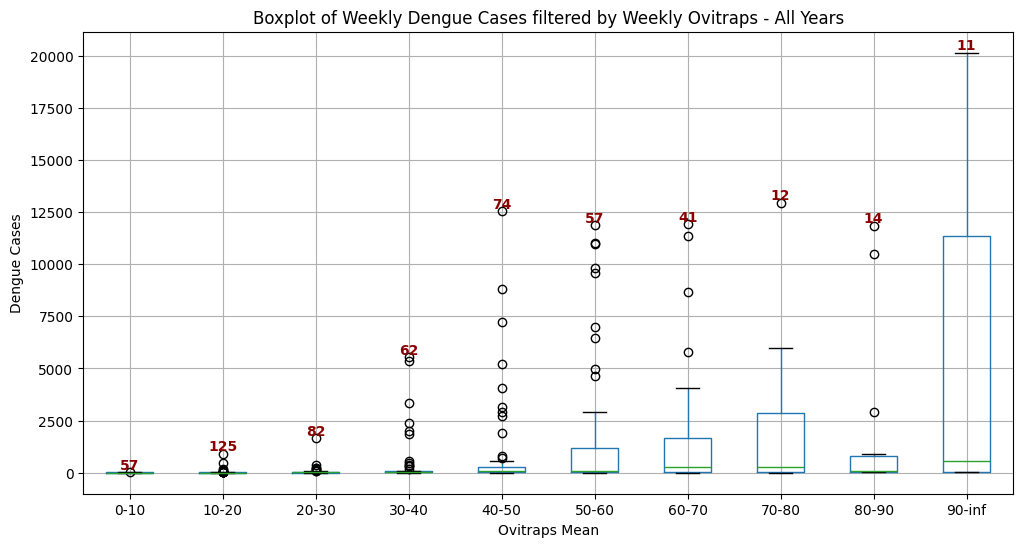

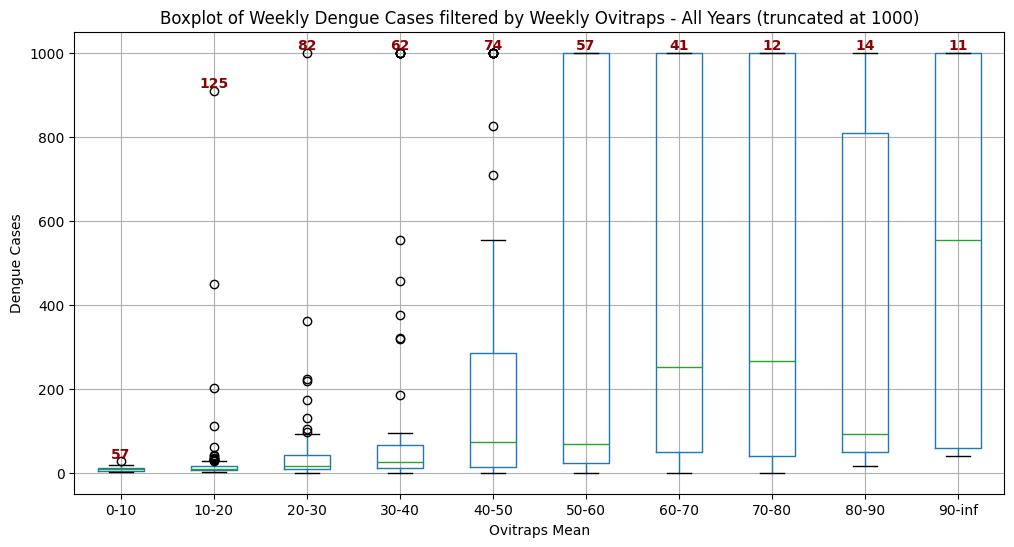

In [51]:
project_utils.boxplot_filtered_data(weekly_dengue_data, weekly_ovitraps_mean_shifted, title = 'Boxplot of Weekly Dengue Cases filtered by Weekly Ovitraps - All Years')


## Epidemy Years

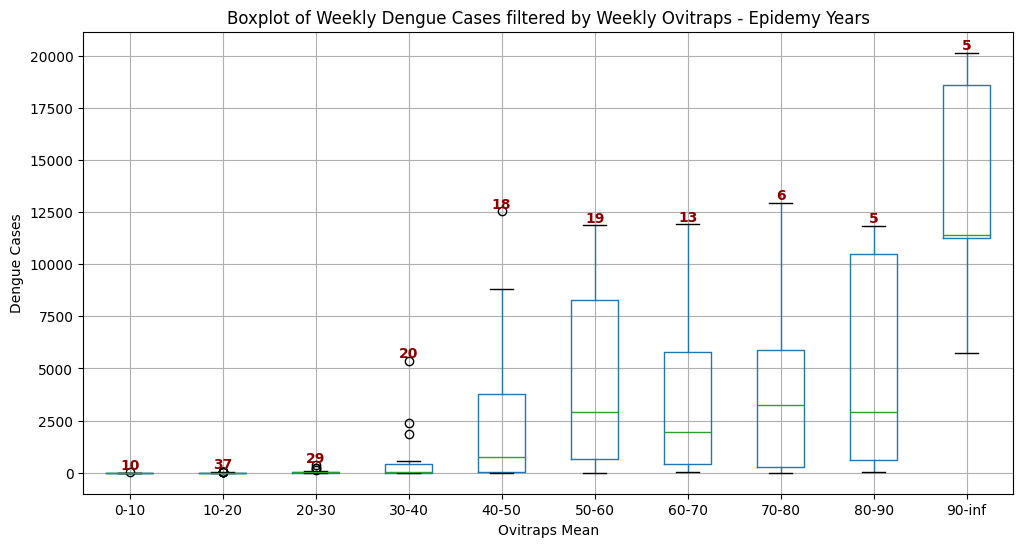

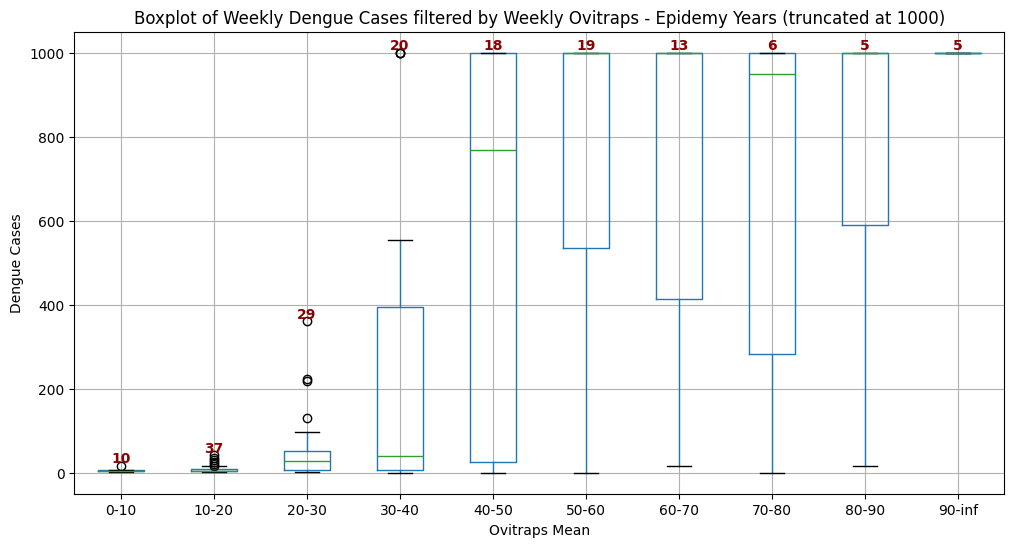

In [52]:
project_utils.boxplot_filtered_data(weekly_dengue_data_epidemic, weekly_ovitraps_mean_shifted, title = 'Boxplot of Weekly Dengue Cases filtered by Weekly Ovitraps - Epidemy Years')

## Non-Epidemy Years

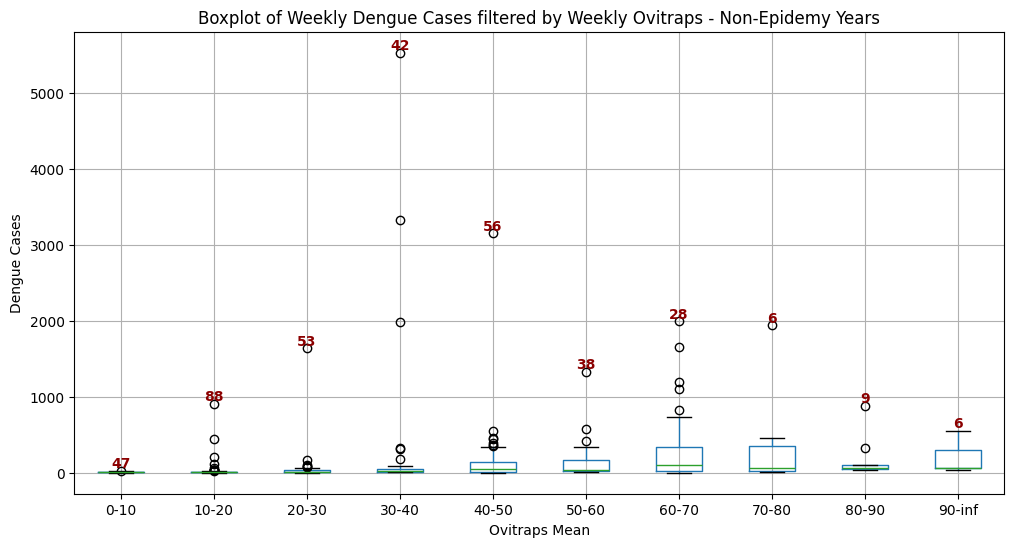

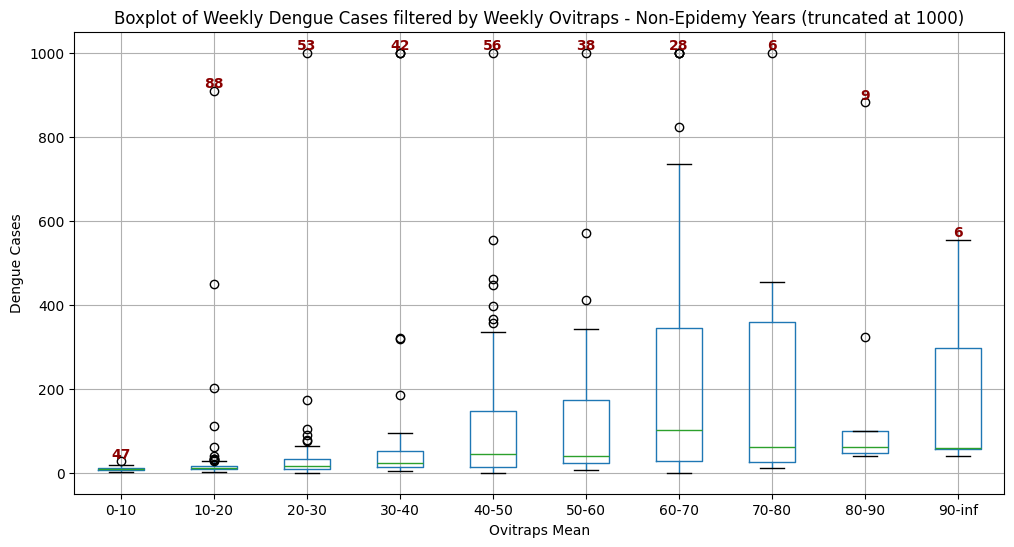

In [53]:
project_utils.boxplot_filtered_data(weekly_dengue_data_non_epidemic, weekly_ovitraps_mean_shifted, title = 'Boxplot of Weekly Dengue Cases filtered by Weekly Ovitraps - Non-Epidemy Years')


## Years by year

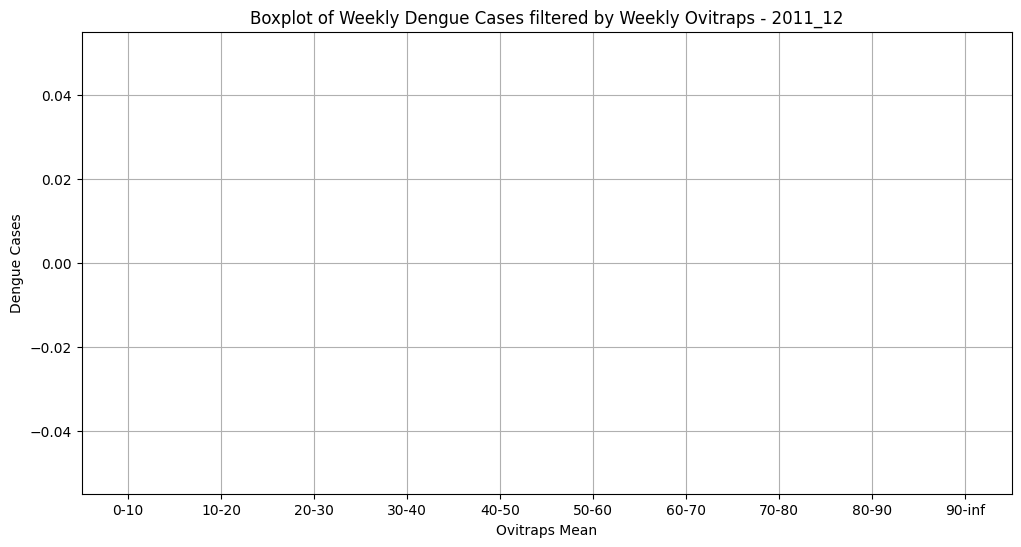

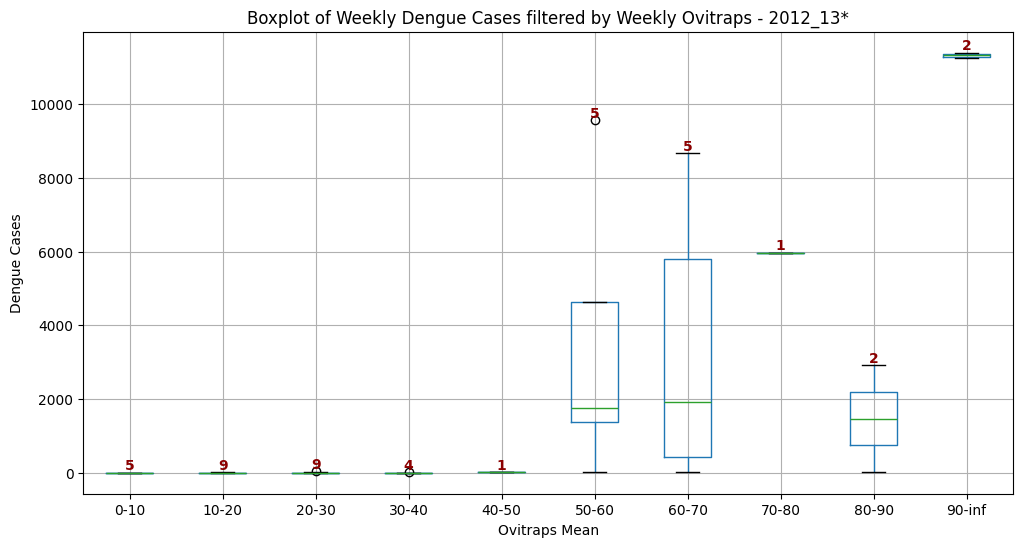

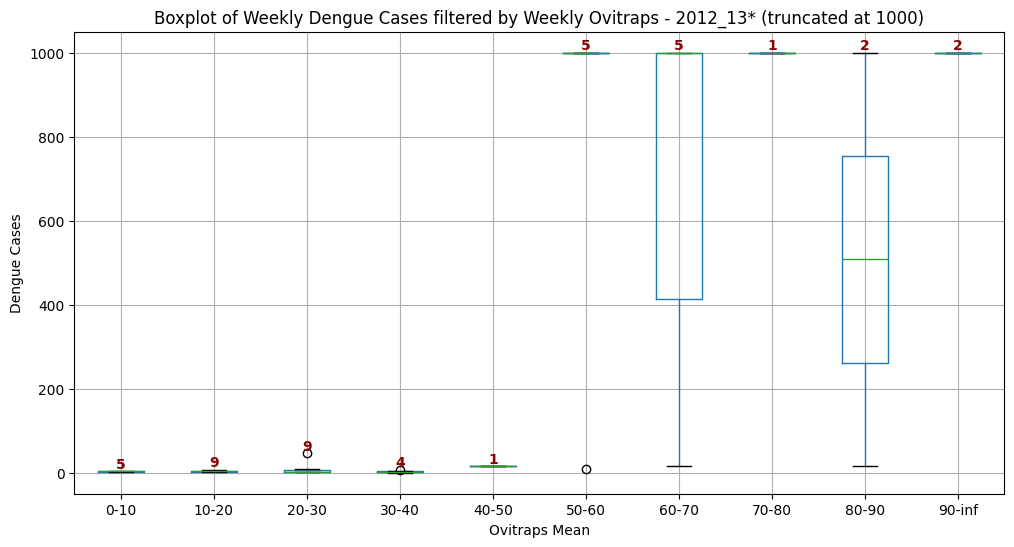

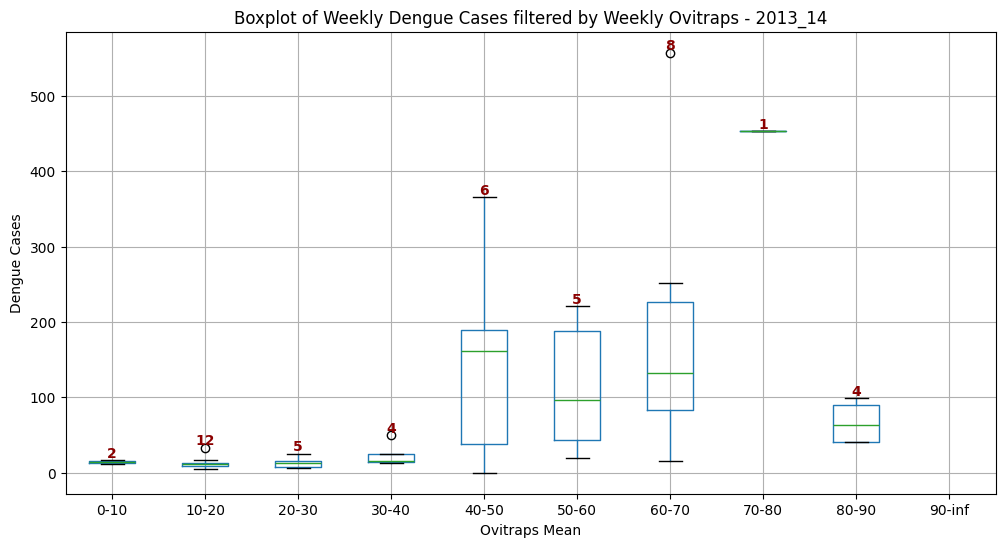

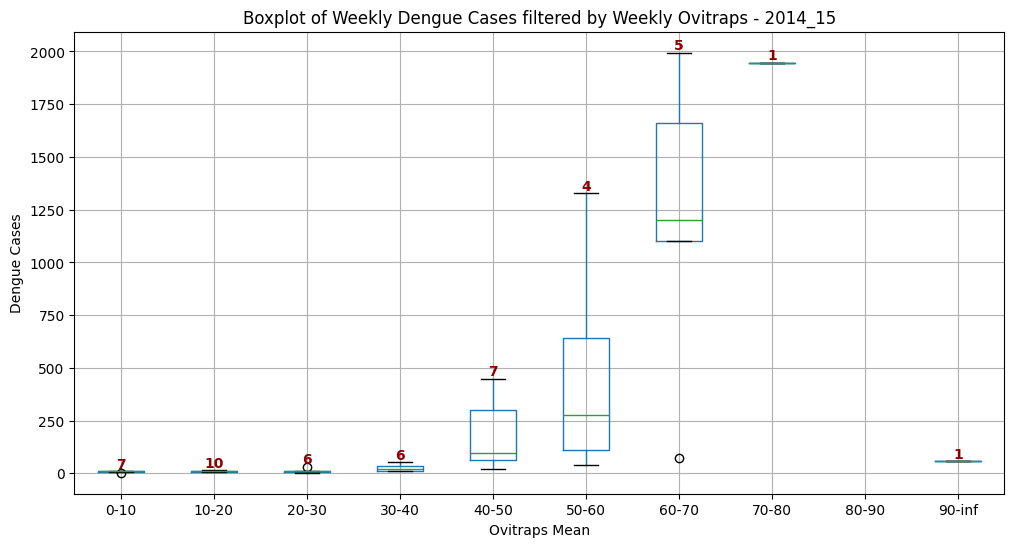

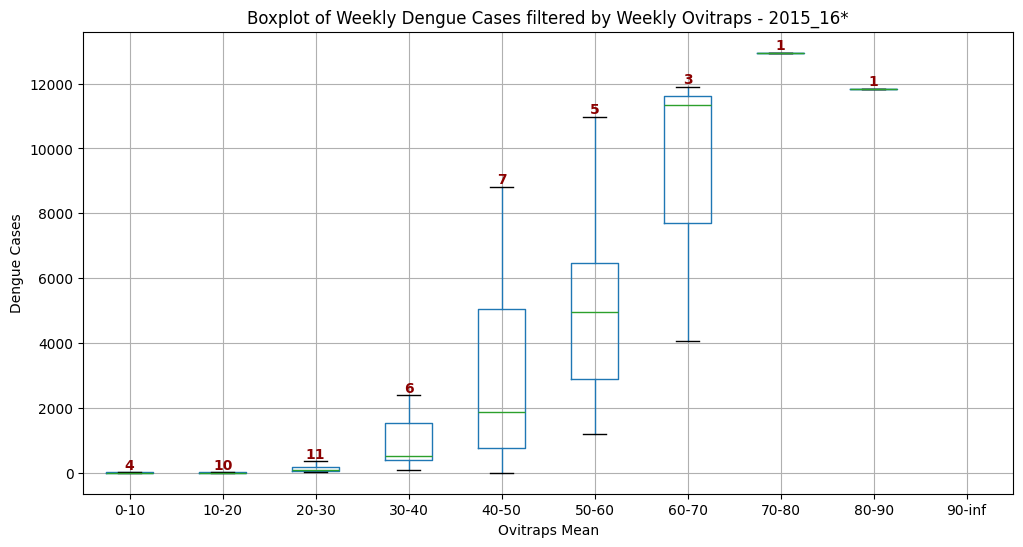

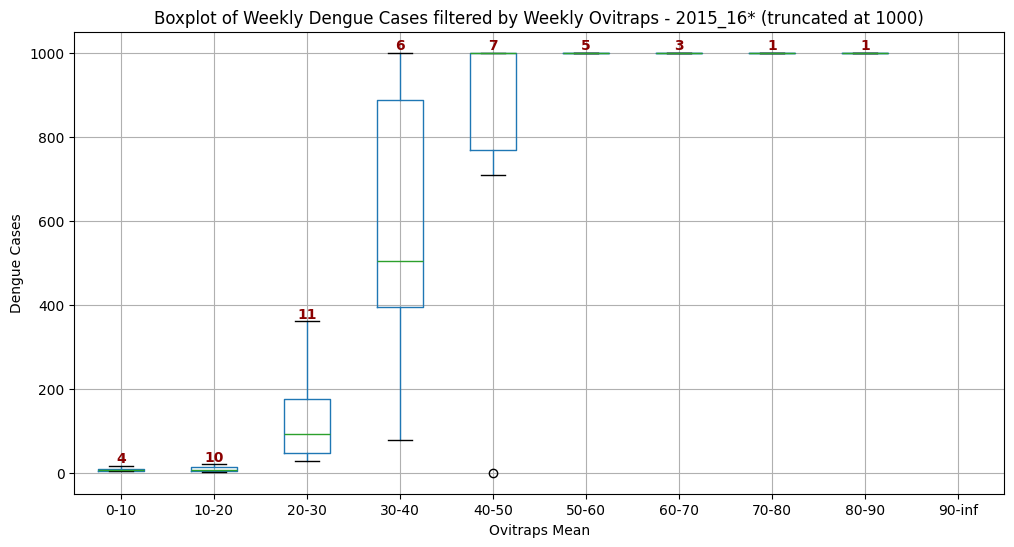

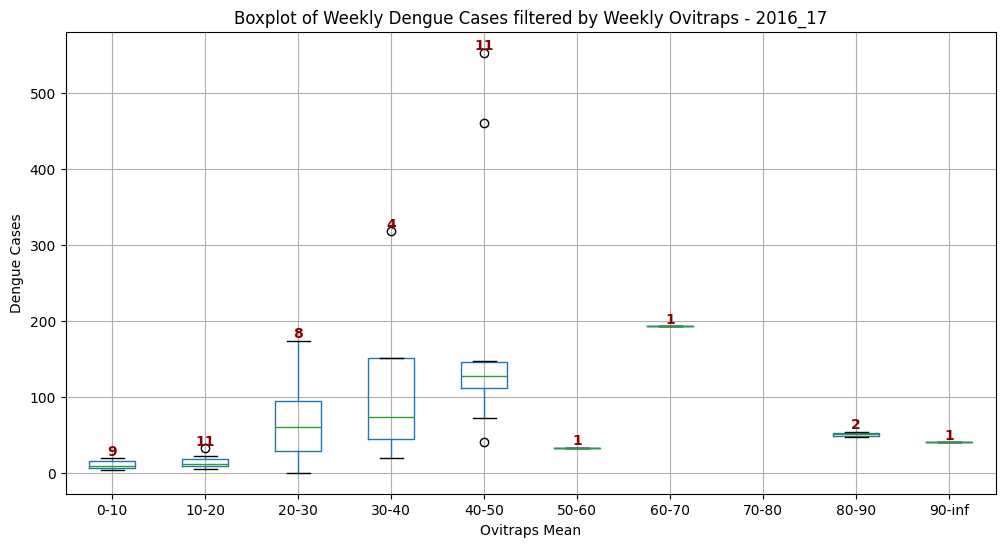

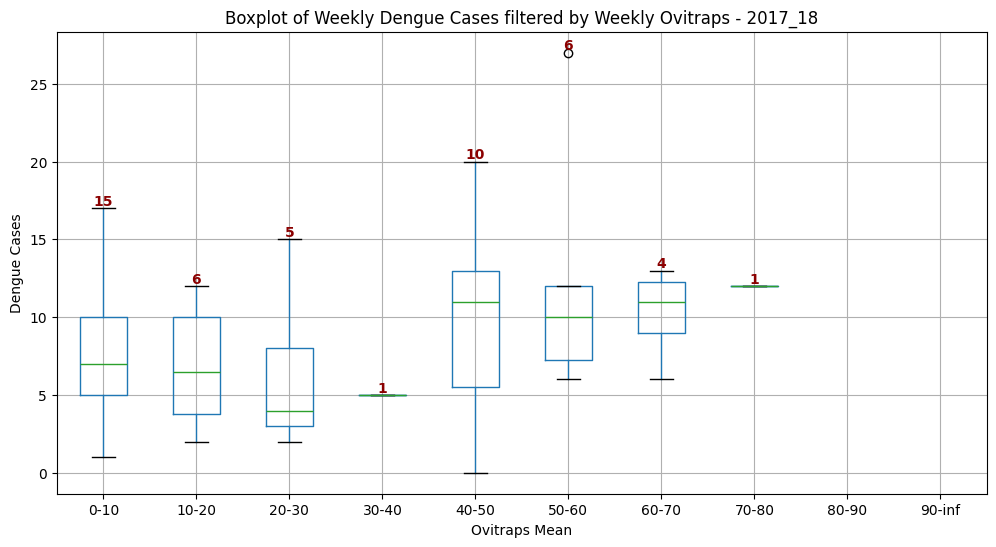

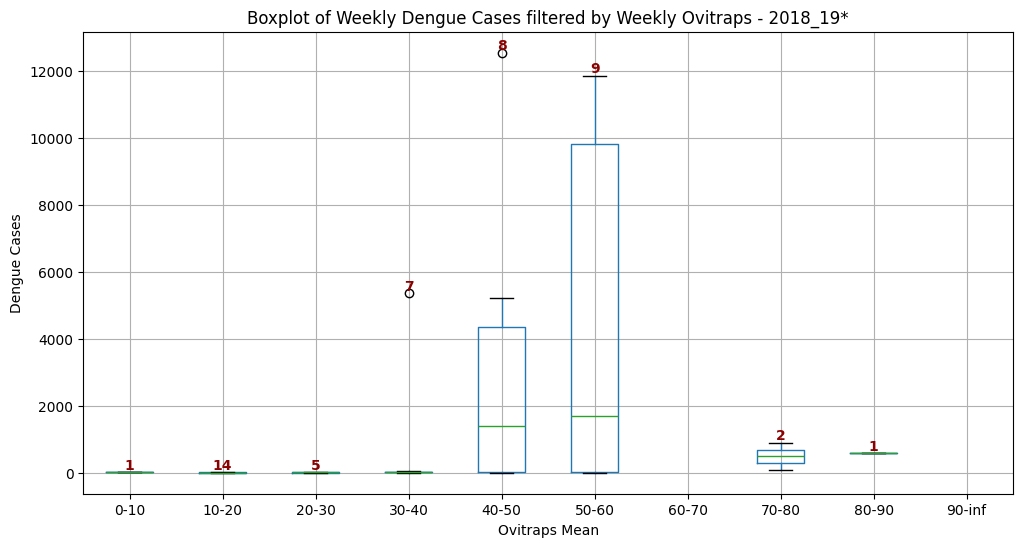

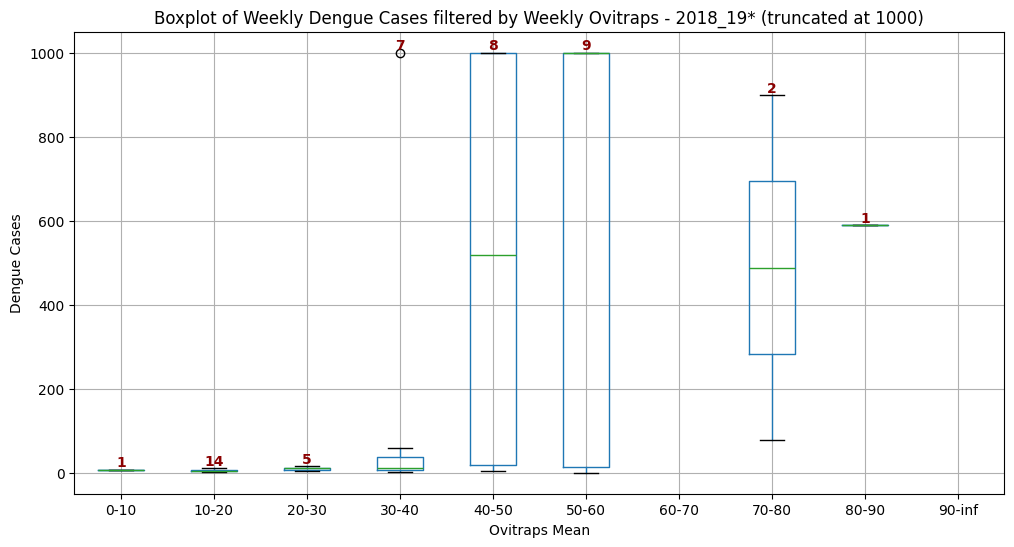

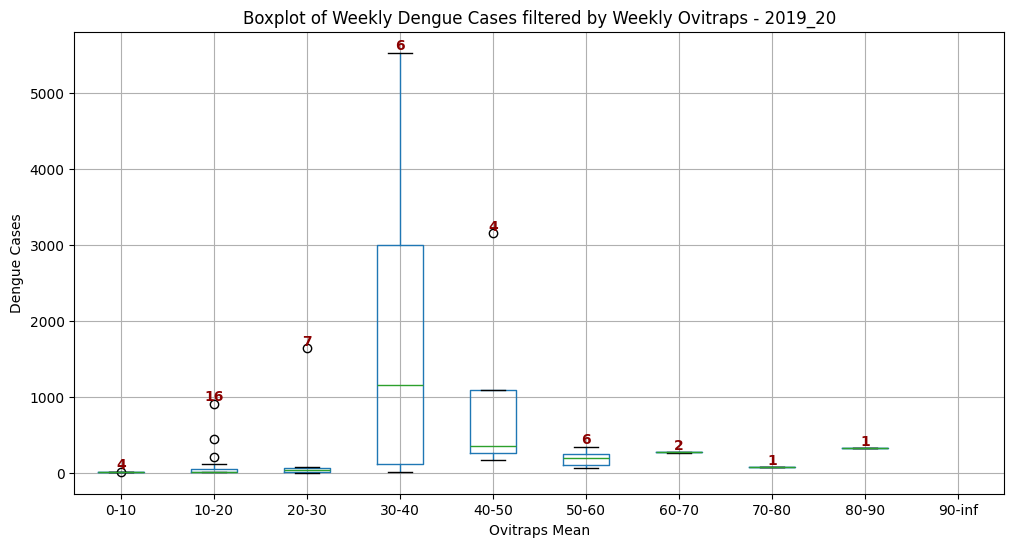

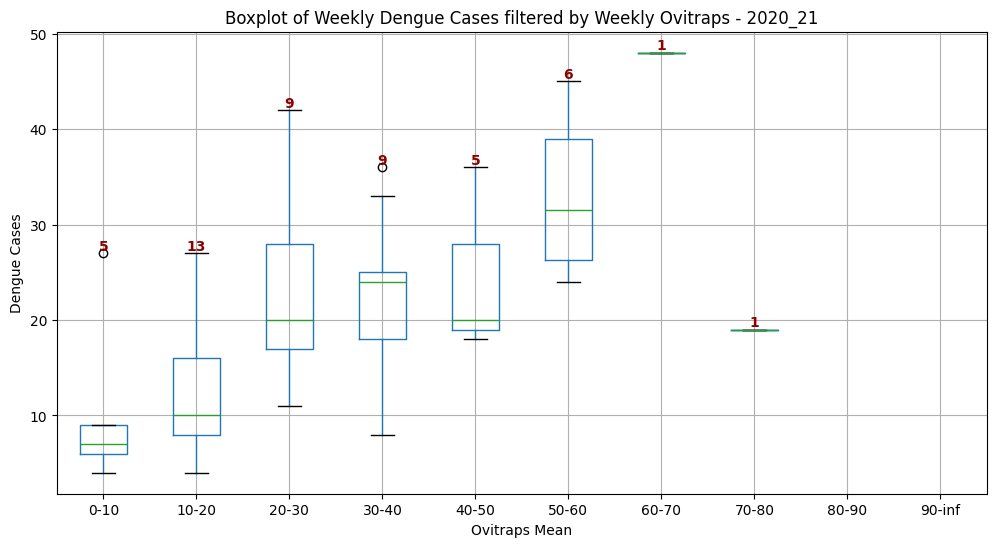

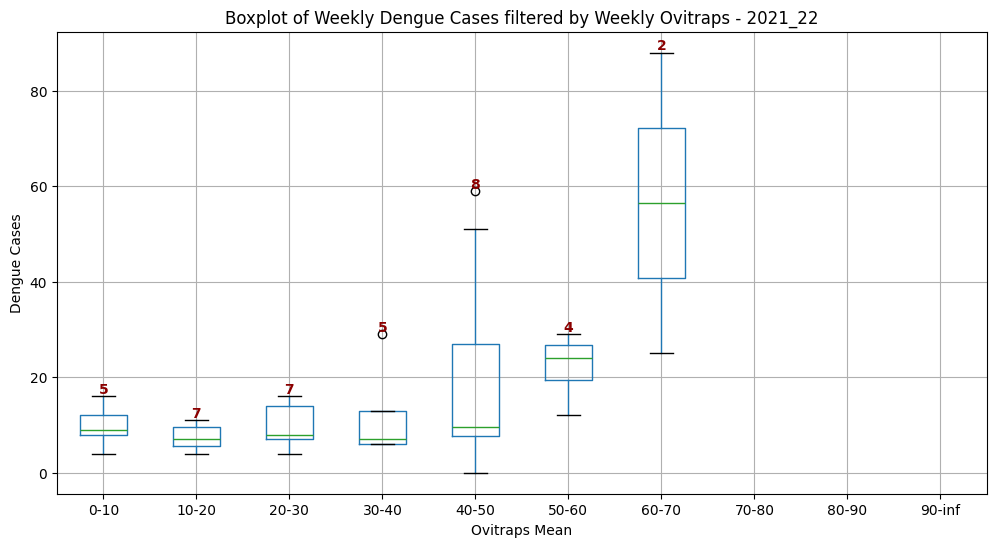

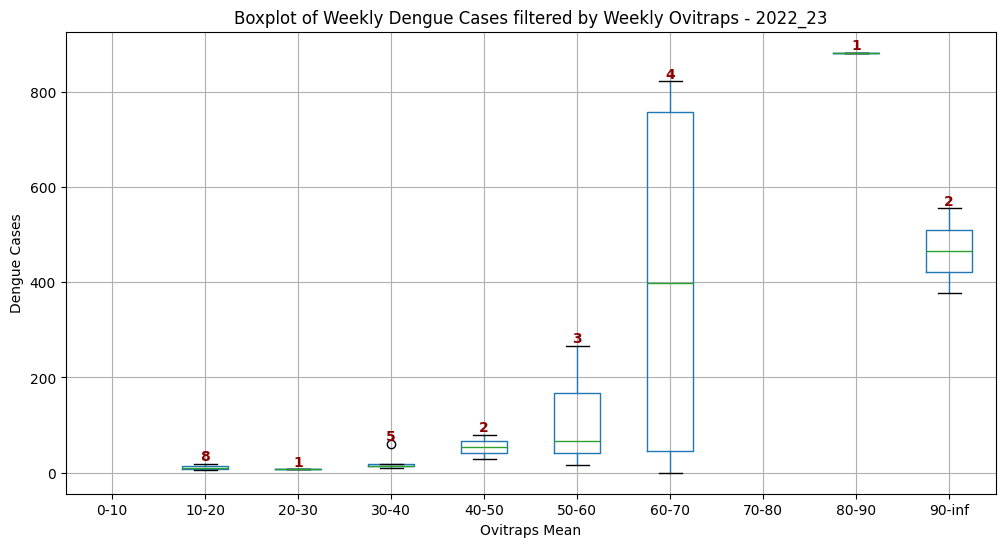

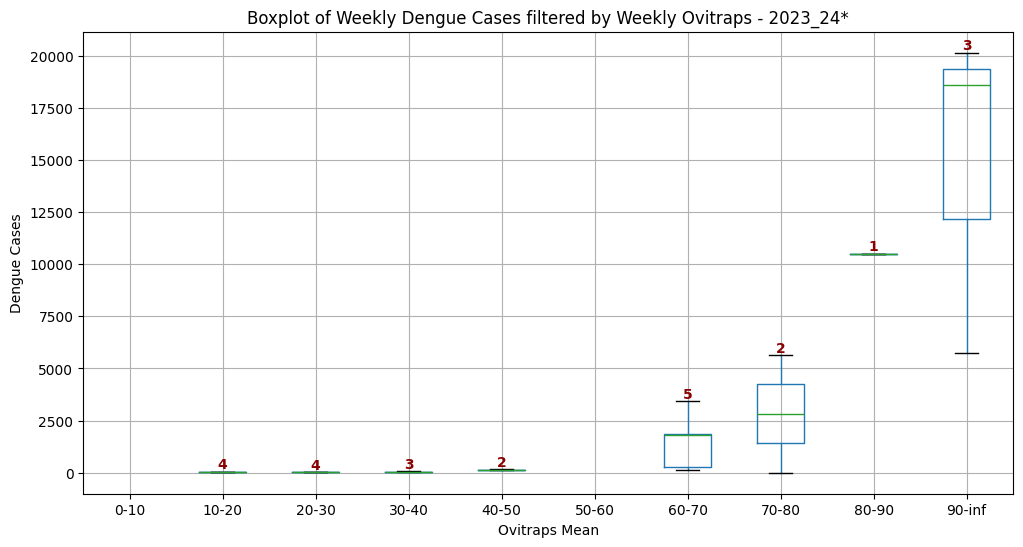

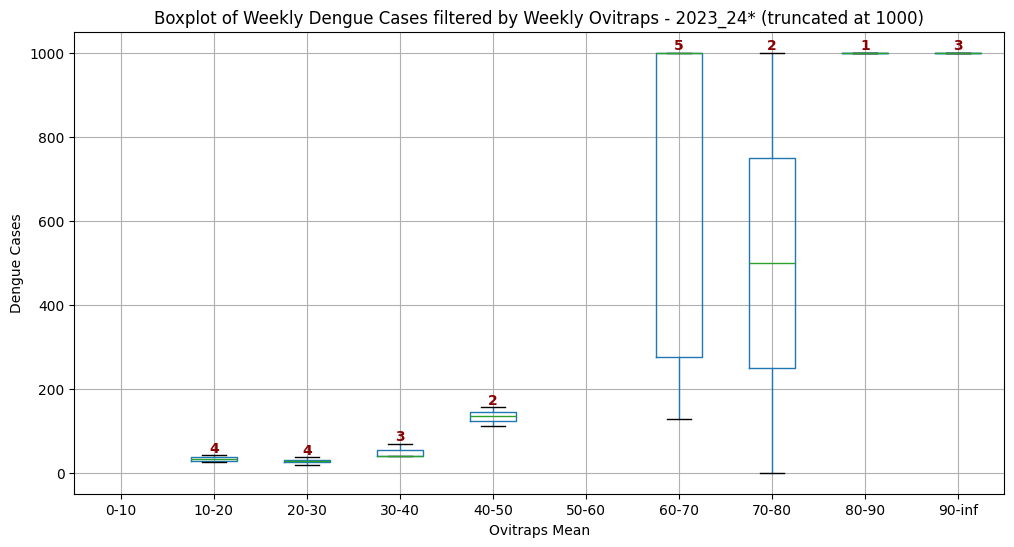

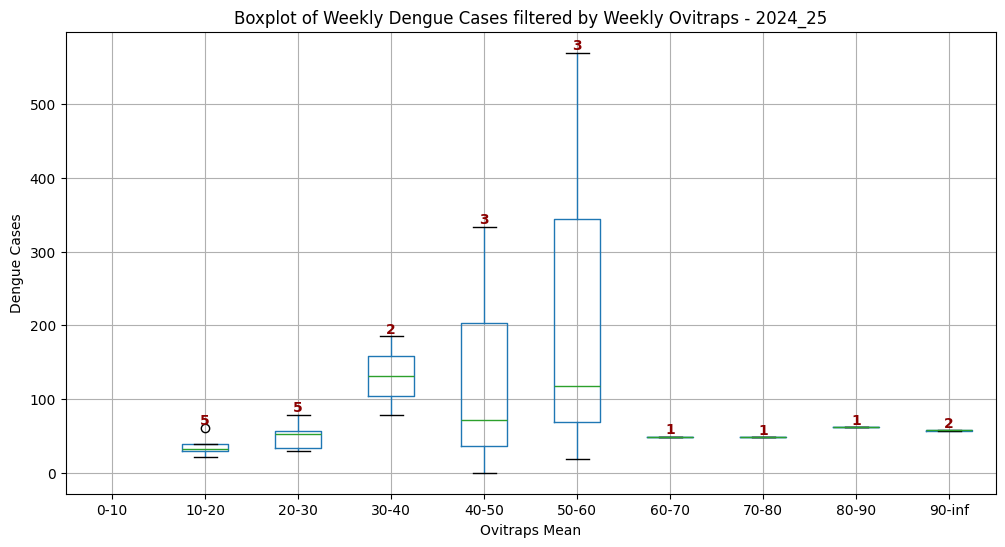

In [54]:
dengue_years = dengue_data.anoepid.unique()
ovitraps_years = ovitraps_data.anoepid.unique()
all_years = list(set(dengue_years).intersection(set(ovitraps_years)))
all_years.sort()
max_correlation_dict = {}
for year in all_years:
    year_mask = weekly_dengue_data.index.map(lambda x: x[:7] == year)
    year_data = weekly_dengue_data[year_mask]
    try:
        if year in project_utils.EPIDEMY_YEARS:
            marker = '*'
            truncate = True
        else:
            marker = ''    
            truncate = False
        # Boxplot for each year
        project_utils.boxplot_filtered_data(year_data, weekly_ovitraps_mean_shifted, title=f'Boxplot of Weekly Dengue Cases filtered by Weekly Ovitraps - {year}{marker}',truncate_plot=truncate)

    except ValueError as e:
        print(f"Skipping year {year} due to error: {e}")
        continue
